## Imports

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import pickle

import helpers
import plotting
import scienceplots
plt.style.use(['science','no-latex'])
# plt.style.use(['science','ieee','no-latex'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [5]:
with open('data.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    all_data = data_dict['data']
    meta_data = data_dict['meta_data']

# Plot learning curves

## All clusters

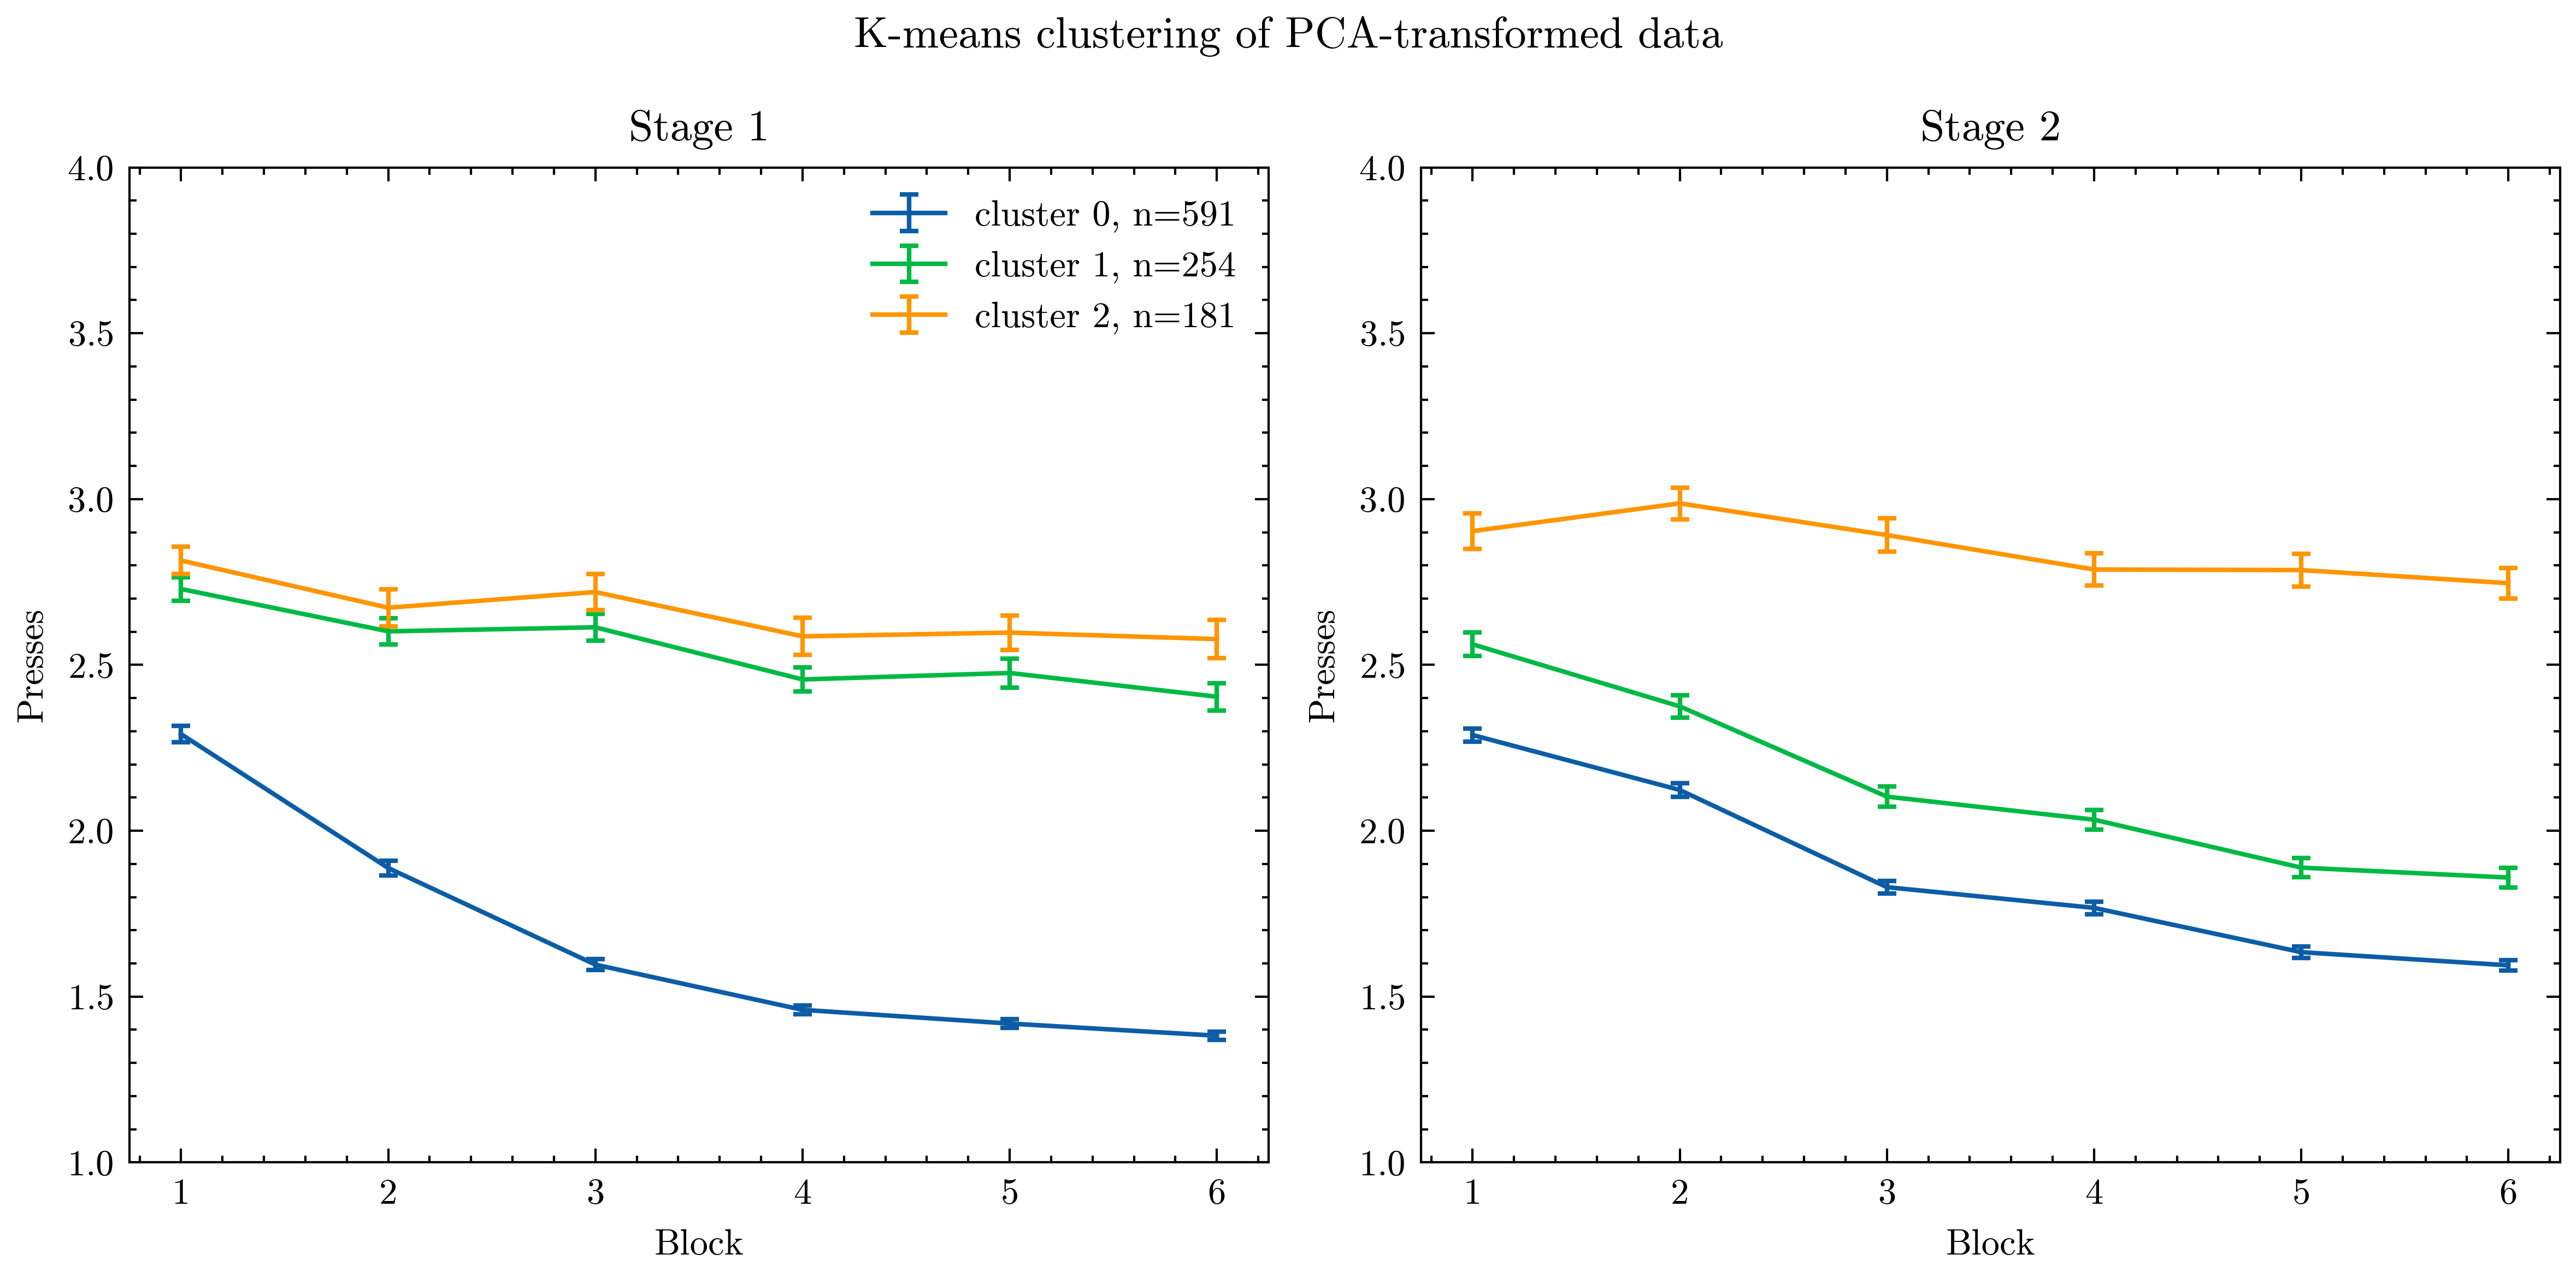

In [20]:
K = len(np.unique(meta_data['Cluster']))
blocks = np.arange(1,7)
fig, axes = plt.subplots(1,2,figsize=(8,4))
mean_population_counter1, mean_population_counter2 = helpers.calc_mean(all_data, trials_to_probe=10, start_trial=0)
mean_population_counter1 = mean_population_counter1[:,:6]
mean_population_counter2 = mean_population_counter2[:,:6]
for i in range(K):
    this_clu_size = np.sum(meta_data['Cluster']==i)
    axes[0].errorbar(blocks, 
                np.nanmean(mean_population_counter1[meta_data['Cluster']==i],axis=0),
                stats.sem(mean_population_counter1[meta_data['Cluster']==i],axis=0,nan_policy='omit'),
                capsize=2, label='cluster '+str(i)+', n='+str(this_clu_size))
    axes[1].errorbar(blocks, 
                np.nanmean(mean_population_counter2[meta_data['Cluster']==i],axis=0),
                stats.sem(mean_population_counter2[meta_data['Cluster']==i],axis=0,nan_policy='omit'),
                capsize=2, label='cluster '+str(i)+', n='+str(this_clu_size))
    
axes[0].set_xticks(blocks,blocks)
axes[1].set_xticks(blocks,blocks)
axes[0].set_xlabel('Block')
axes[1].set_xlabel('Block')
axes[0].set_ylabel('Presses')
axes[1].set_ylabel('Presses')
axes[0].set_ylim([1,4])
axes[1].set_ylim([1,4])
axes[0].legend()
axes[0].set_title('Stage 1')
axes[1].set_title('Stage 2')

plt.suptitle(f'K-means clustering of PCA-transformed data')
plt.tight_layout()
plt.savefig('plots/learning_curves_all_clusters.svg', format='svg', dpi=1200)

## Cluster 0

### V1-V1, V1-V2, V1-V3

One-sided paired t-test between Blocks 7 and 11 for V1-V1:
Ttest_relResult(statistic=3.283914044098074, pvalue=0.0006416779671005344)

One-sided paired t-test between Blocks 7 and 11 for V1-V2:
Ttest_relResult(statistic=4.167098371054818, pvalue=3.8356486884551844e-05)

One-sided t-test between V1-V1 and V1-V2 on Block 11:
Ttest_indResult(statistic=-0.08982838090949341, pvalue=0.5357484239894076)

One-sided paired t-test between Blocks 7 and 11 for V1-V3:
Ttest_relResult(statistic=2.607200072394568, pvalue=0.0057502145042932)

One-sided t-test between V1-V2 and V1-V3 on Block 11:
Ttest_indResult(statistic=-0.4353976055159475, pvalue=0.6680301952889423)


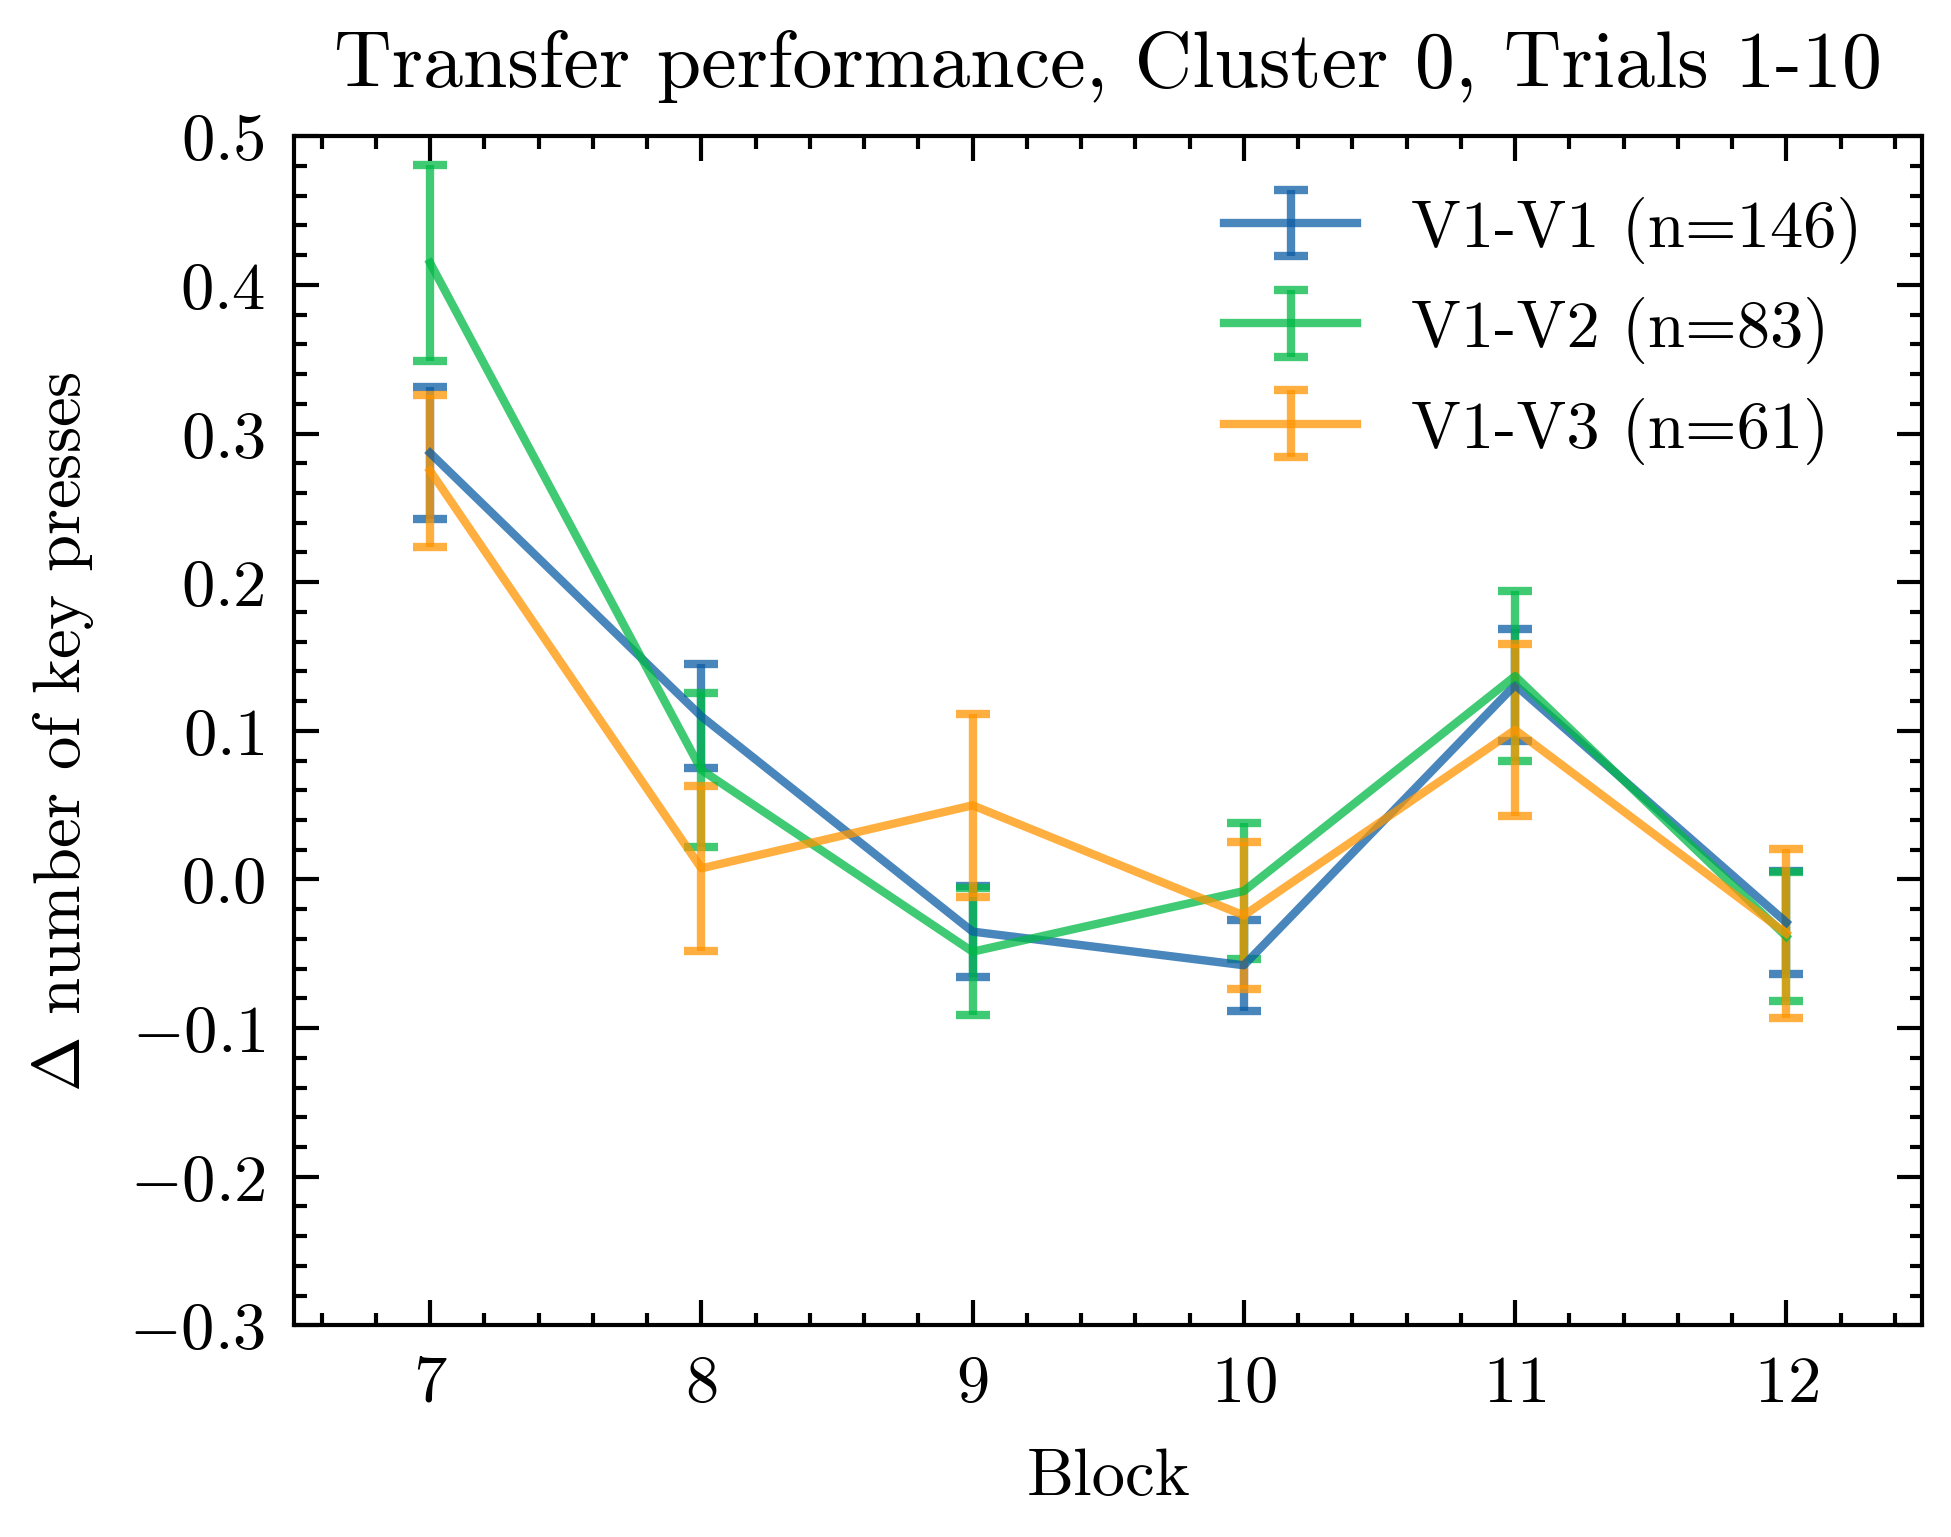

In [21]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V1-V1', 'V1-V2', 'V1-V3', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V2-V1, V2-V2

One-sided paired t-test between Blocks 7 and 11 for V2-V1:
Ttest_relResult(statistic=2.36058166887825, pvalue=0.010267591972178903)

One-sided paired t-test between Blocks 7 and 11 for V2-V2:
Ttest_relResult(statistic=2.494859579337248, pvalue=0.007385472389250694)

One-sided t-test between V2-V1 and V2-V2 on Block 11:
Ttest_indResult(statistic=-1.3407931140774354, pvalue=0.9090618443178253)



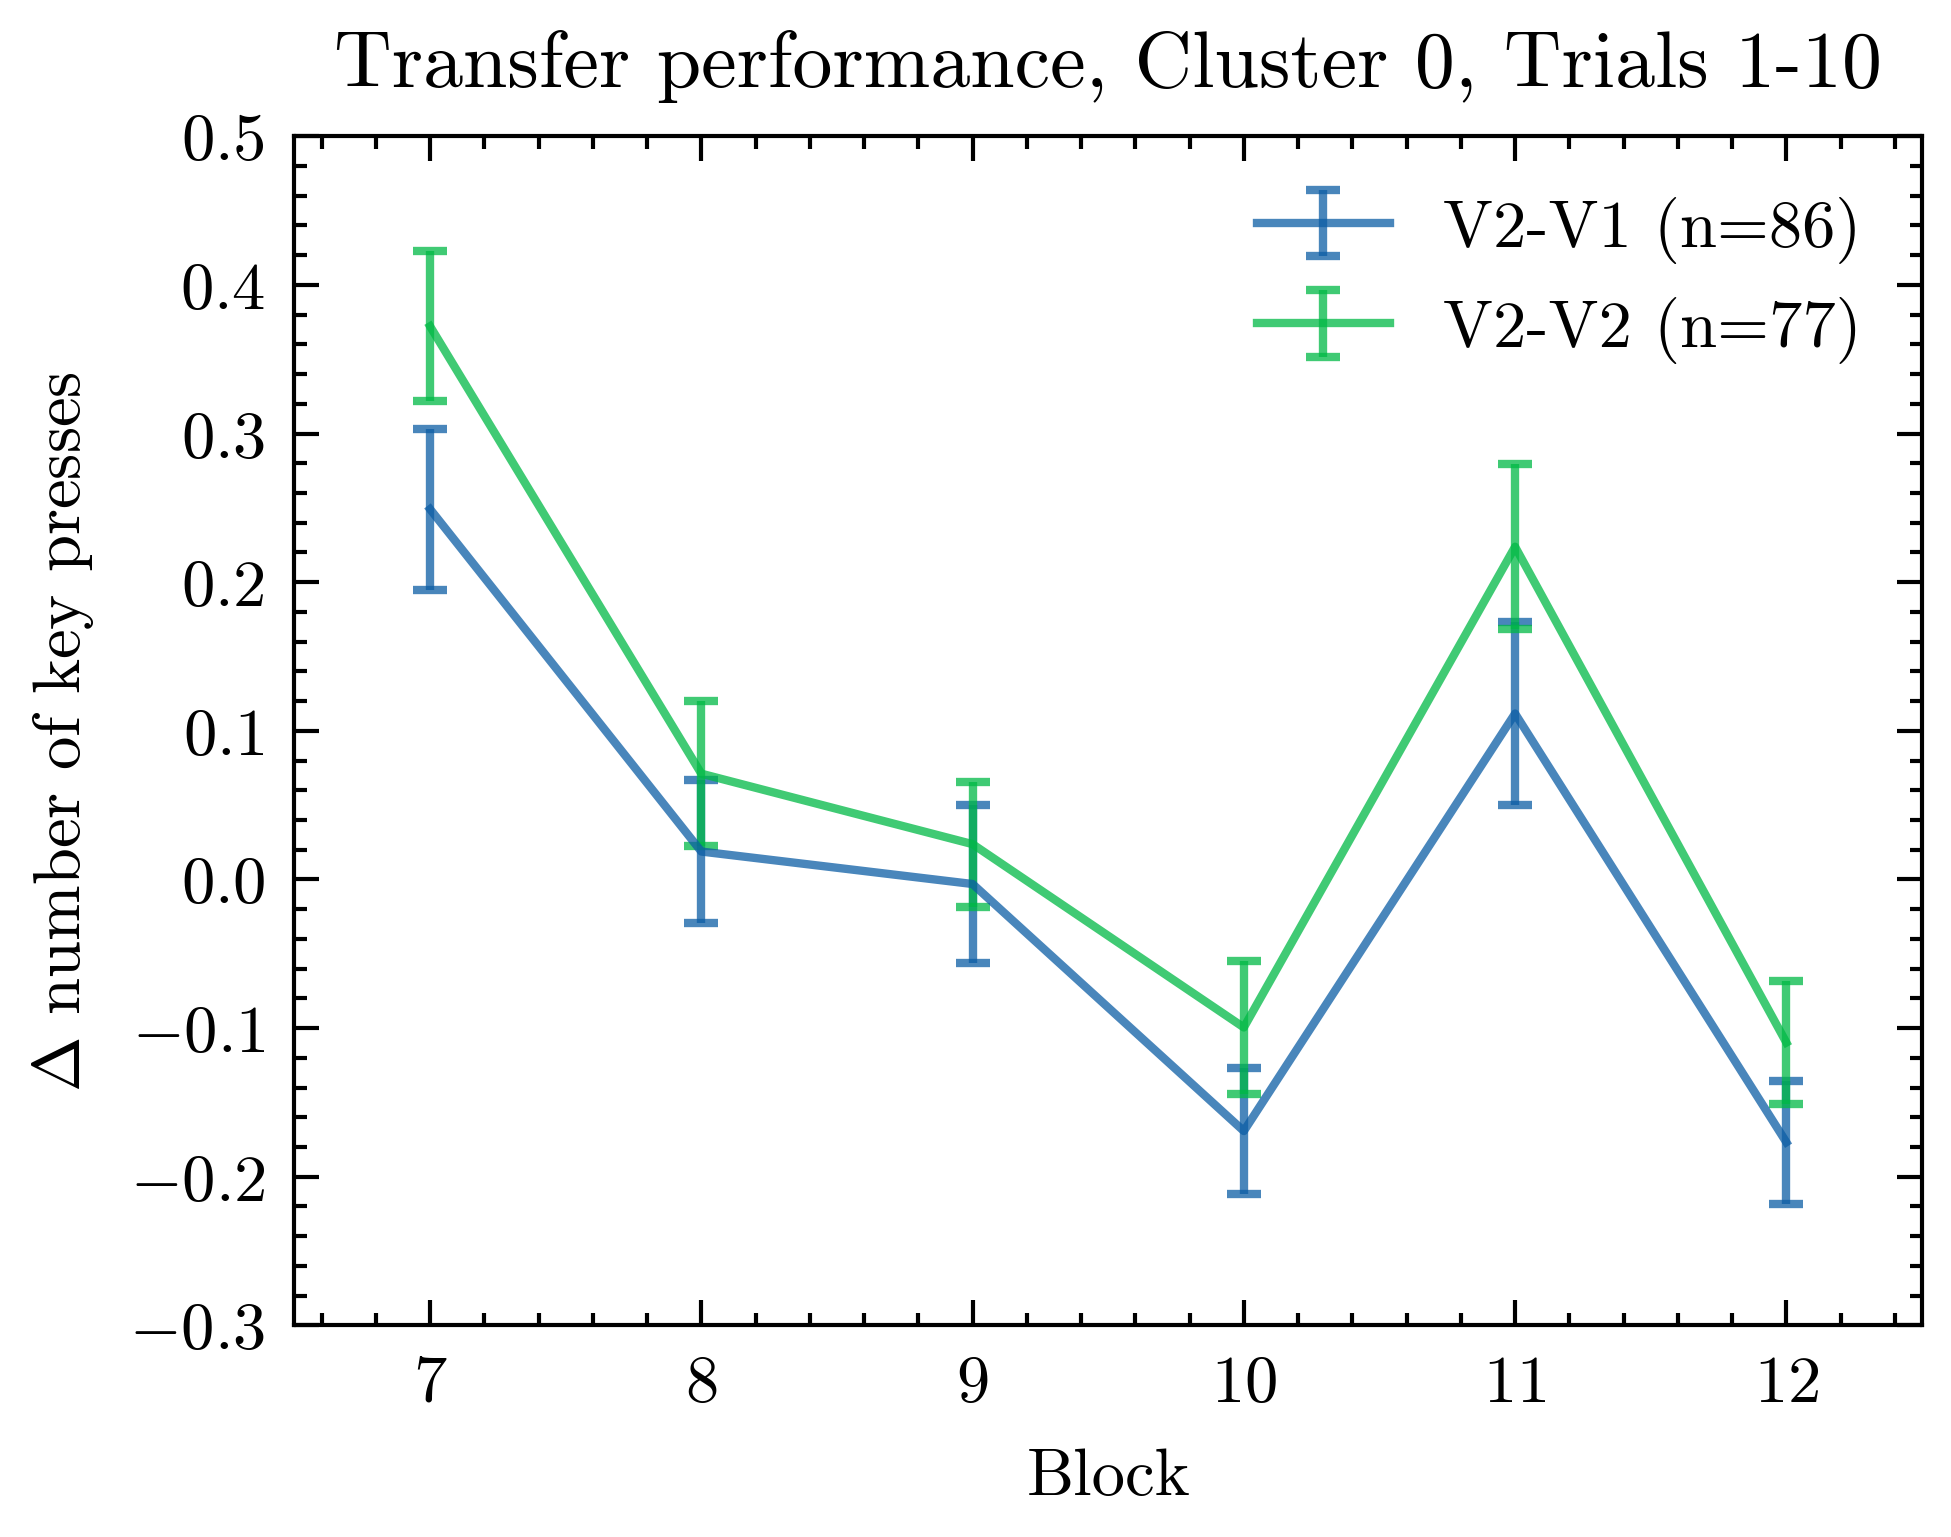

In [22]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V2-V1', 'V2-V2', '', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V3-V1, V3-V3

One-sided paired t-test between Blocks 7 and 11 for V3-V1:
Ttest_relResult(statistic=0.6303988487002837, pvalue=0.26513814765319077)

One-sided paired t-test between Blocks 7 and 11 for V3-V3:
Ttest_relResult(statistic=5.588514712740049, pvalue=3.214475018762866e-07)

One-sided t-test between V3-V1 and V3-V3 on Block 11:
Ttest_indResult(statistic=3.8866284121353485, pvalue=7.909118752547966e-05)



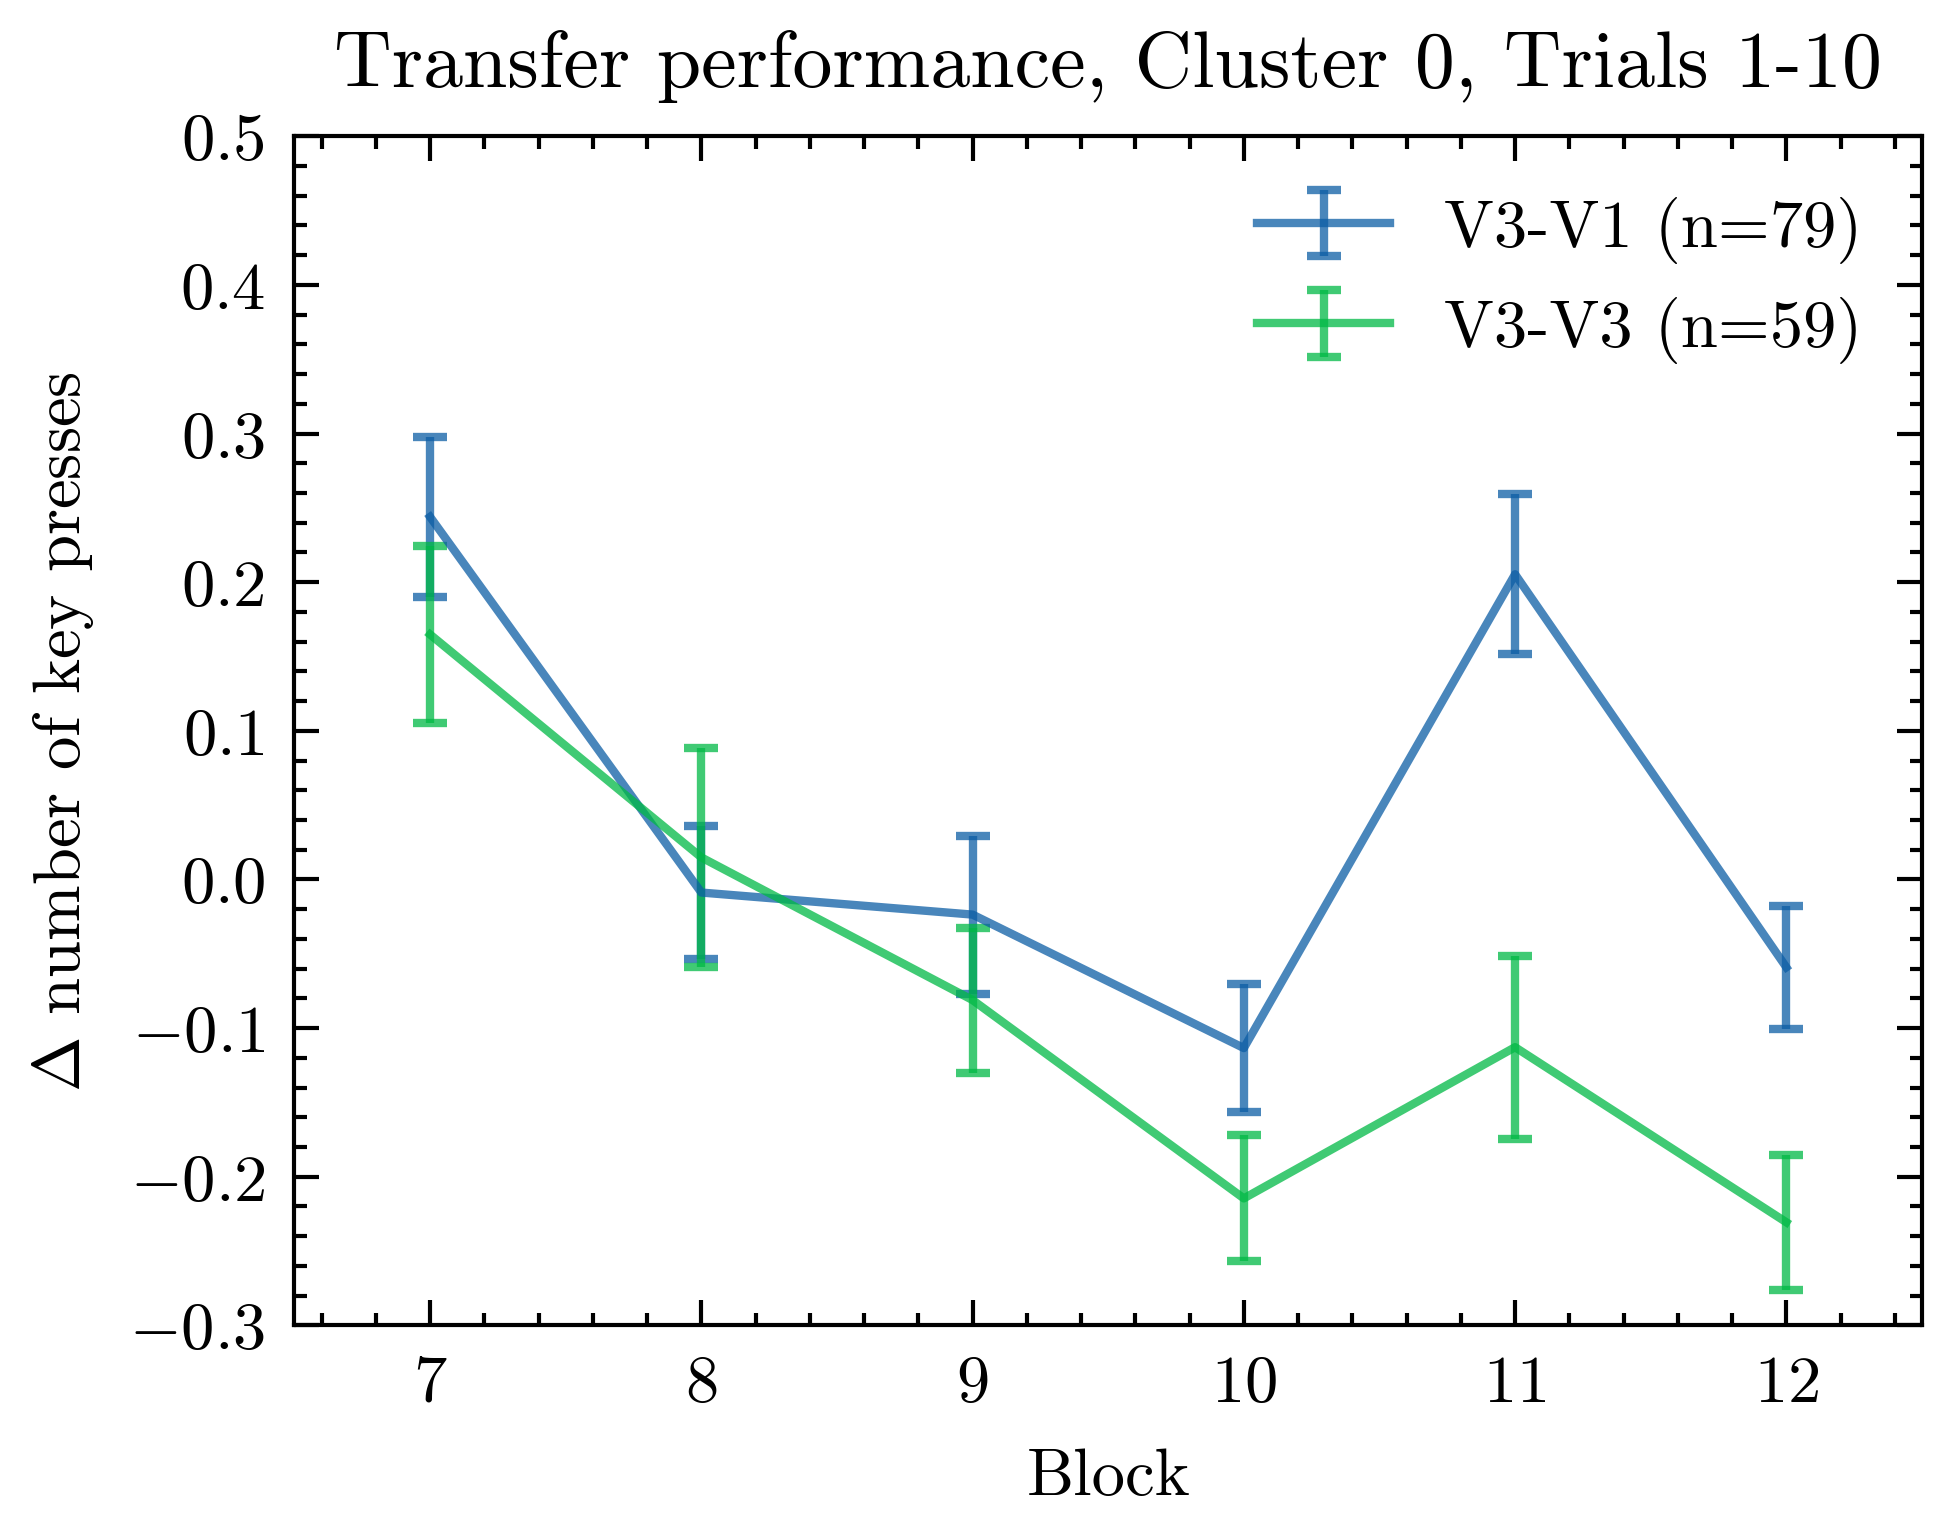

In [23]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V3-V1', 'V3-V3', '', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V1-V1, V2-V1, V3-V1

One-sided paired t-test between Blocks 7 and 11 for V2-V1:
Ttest_relResult(statistic=2.36058166887825, pvalue=0.010267591972178903)

One-sided paired t-test between Blocks 7 and 11 for V3-V1:
Ttest_relResult(statistic=0.6303988487002837, pvalue=0.26513814765319077)

One-sided t-test between V2-V1 and V3-V1 on Block 11:
Ttest_indResult(statistic=-1.1369935482820304, pvalue=0.8713951589552849)



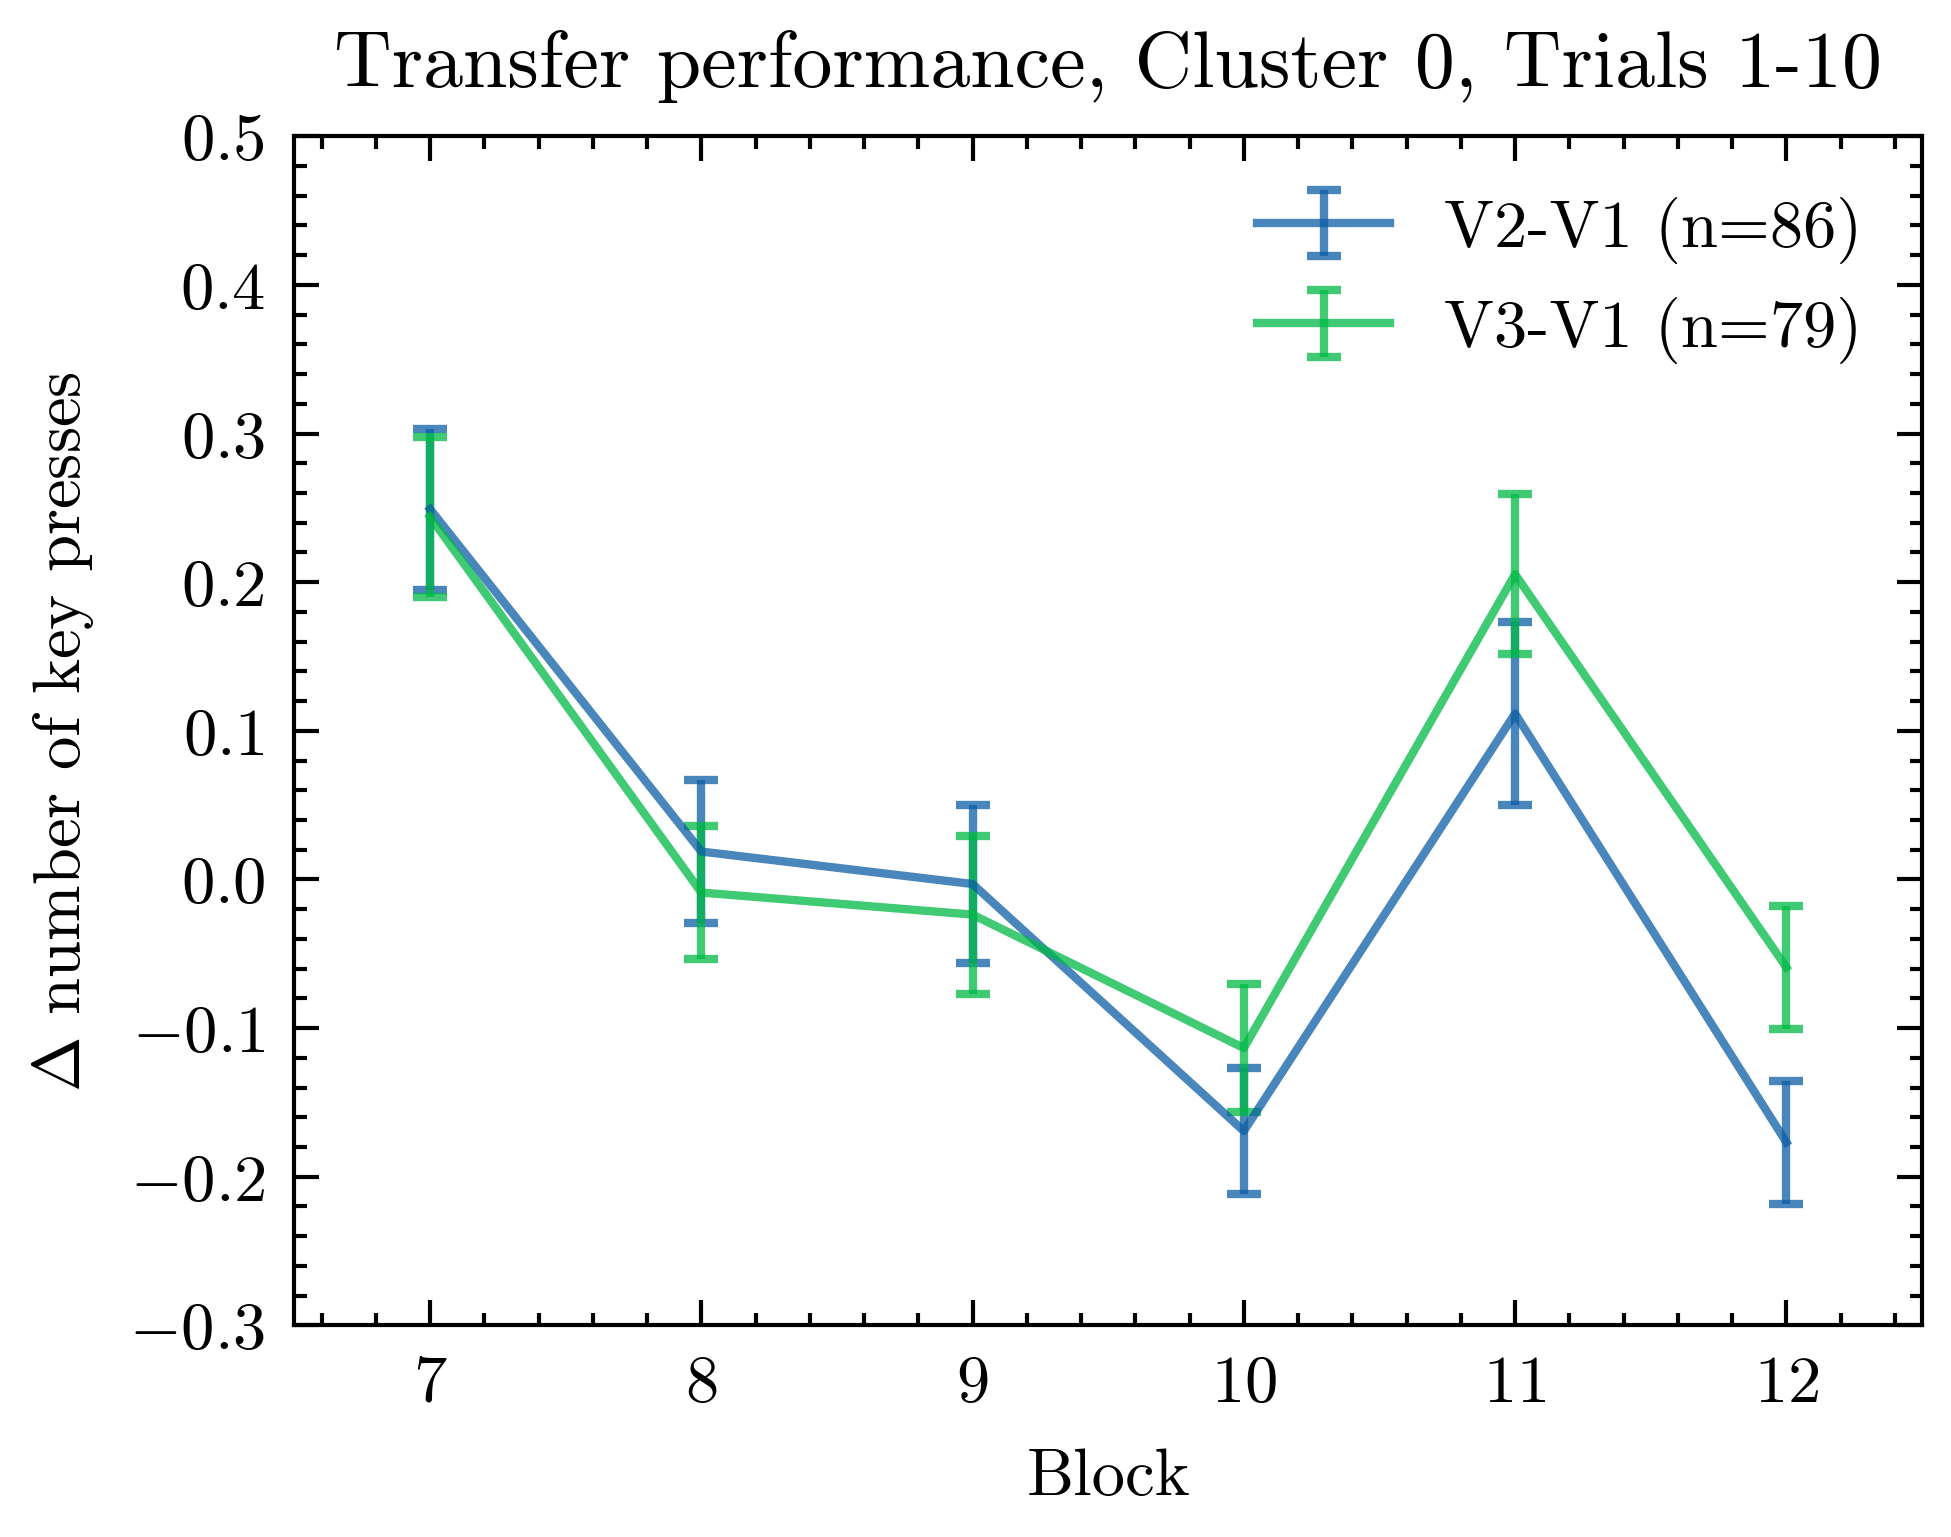

In [24]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V2-V1', 'V3-V1', '', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V1-V3, V3-V3, V3-V1

One-sided paired t-test between Blocks 7 and 11 for V1-V3:
Ttest_relResult(statistic=2.607200072394568, pvalue=0.0057502145042932)

One-sided paired t-test between Blocks 7 and 11 for V3-V3:
Ttest_relResult(statistic=5.588514712740049, pvalue=3.214475018762866e-07)

One-sided t-test between V1-V3 and V3-V3 on Block 11:
Ttest_indResult(statistic=2.5288711872759855, pvalue=0.006381415208160288)

One-sided paired t-test between Blocks 7 and 11 for V3-V1:
Ttest_relResult(statistic=0.6303988487002837, pvalue=0.26513814765319077)

One-sided t-test between V3-V3 and V3-V1 on Block 11:
Ttest_indResult(statistic=3.8866284121353485, pvalue=7.909118752547966e-05)


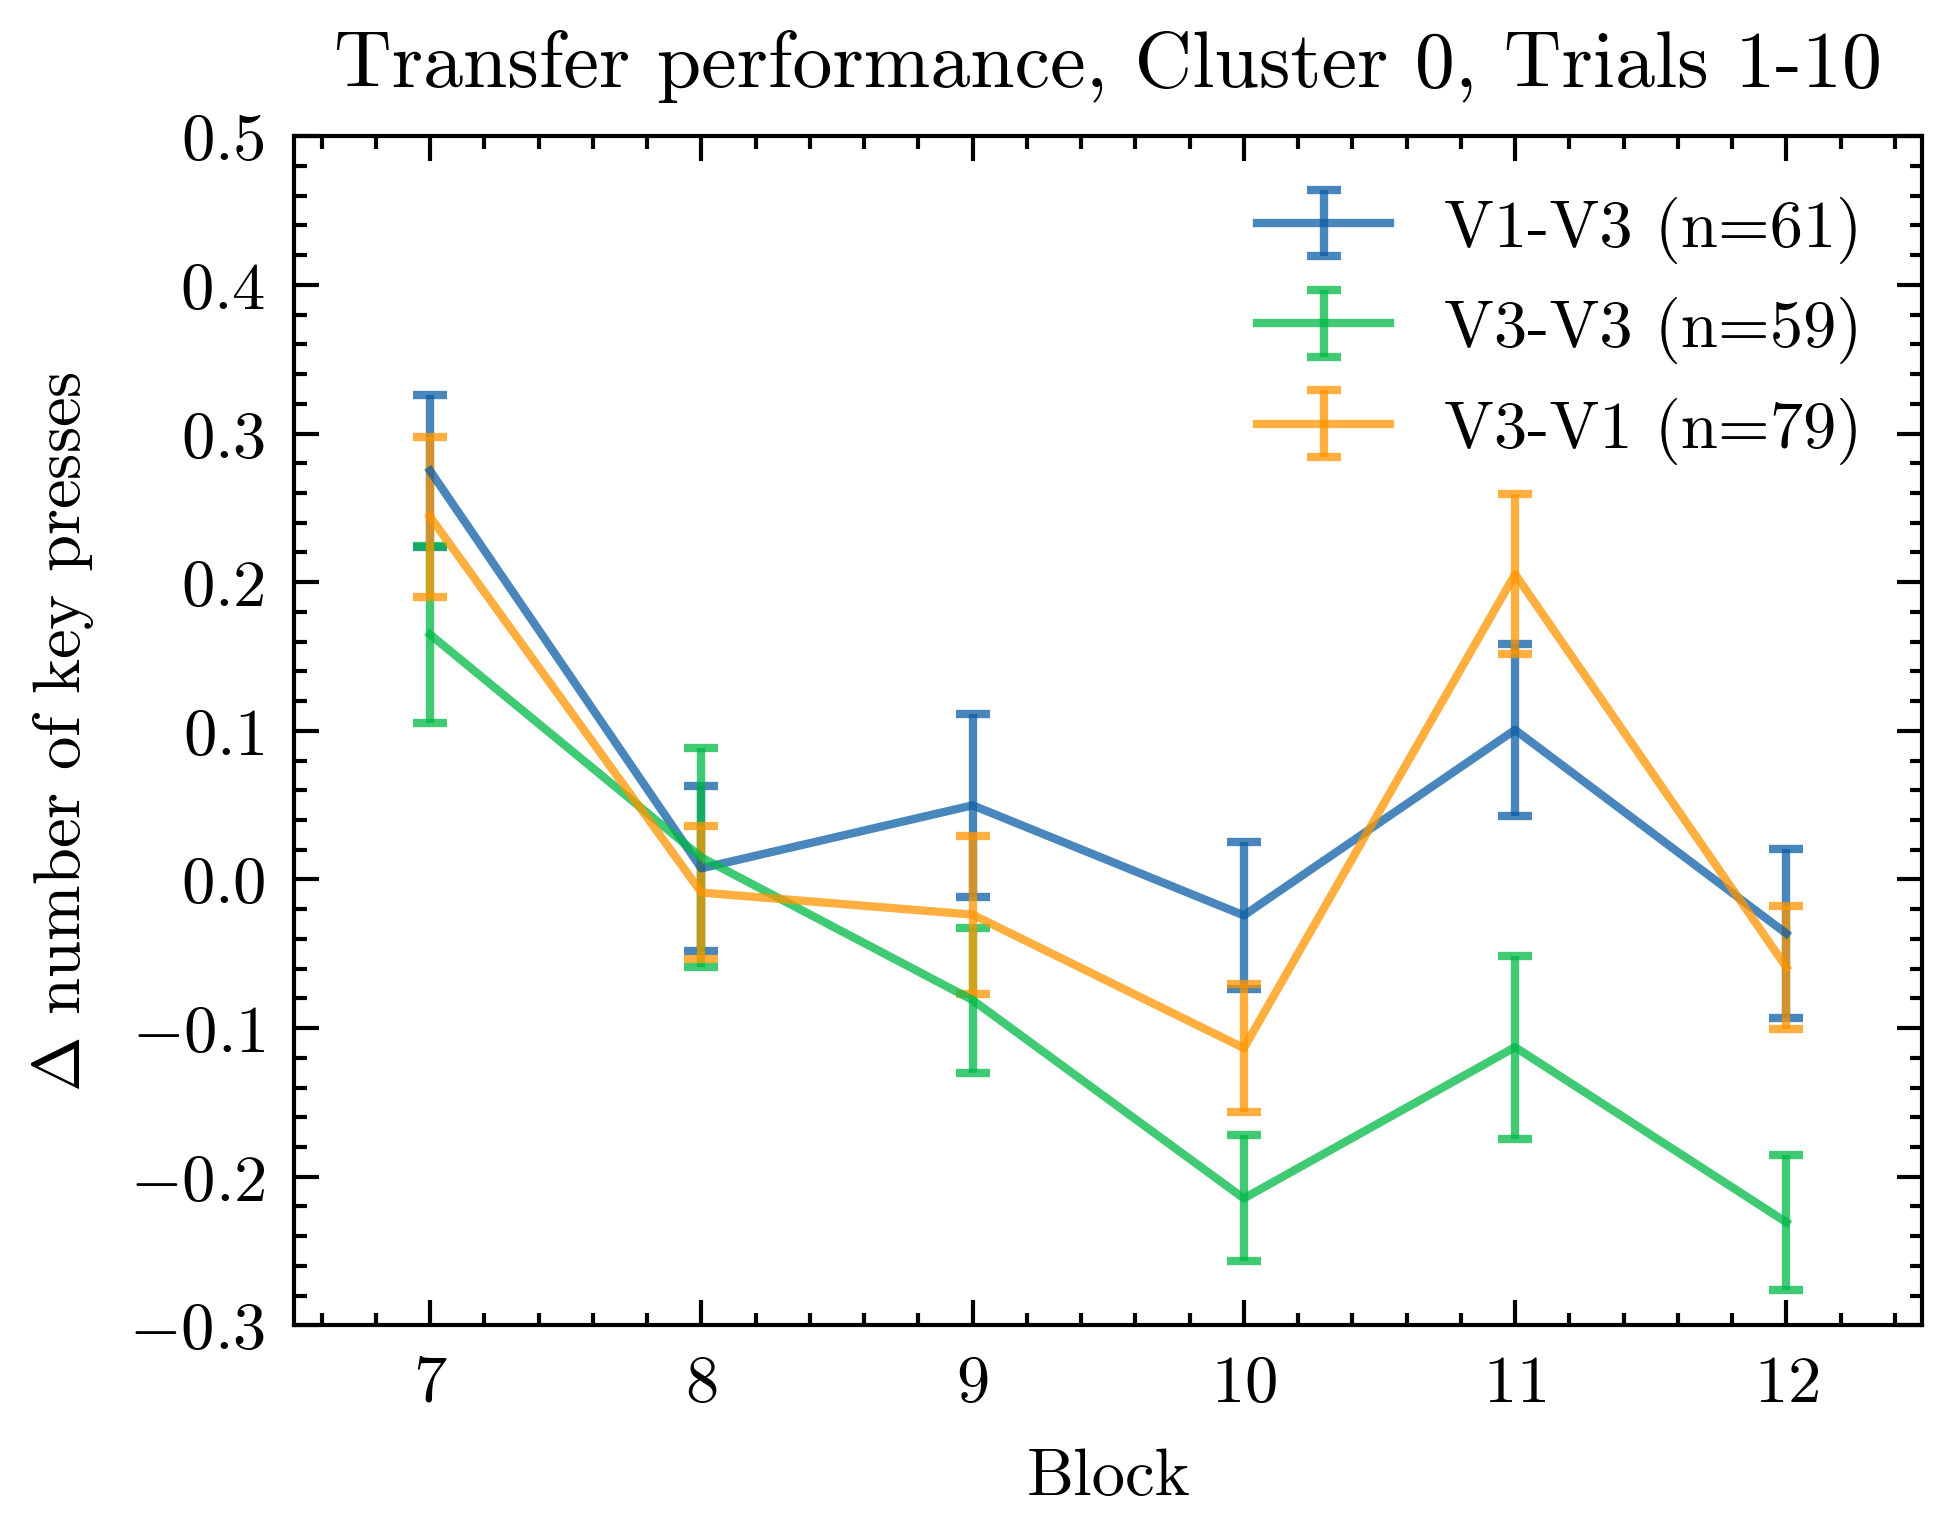

In [25]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V1-V3', 'V3-V3', 'V3-V1', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V1-V1, V2-V2, V3-V3

One-sided paired t-test between Blocks 7 and 11 for V1-V1:
Ttest_relResult(statistic=3.283914044098074, pvalue=0.0006416779671005344)

One-sided paired t-test between Blocks 7 and 11 for V2-V2:
Ttest_relResult(statistic=2.494859579337248, pvalue=0.007385472389250694)

One-sided t-test between V1-V1 and V2-V2 on Block 11:
Ttest_indResult(statistic=-1.417044895212116, pvalue=0.9210610171778646)

One-sided paired t-test between Blocks 7 and 11 for V3-V3:
Ttest_relResult(statistic=5.588514712740049, pvalue=3.214475018762866e-07)

One-sided t-test between V2-V2 and V3-V3 on Block 11:
Ttest_indResult(statistic=-4.0455244995662865, pvalue=0.9999561462446457)


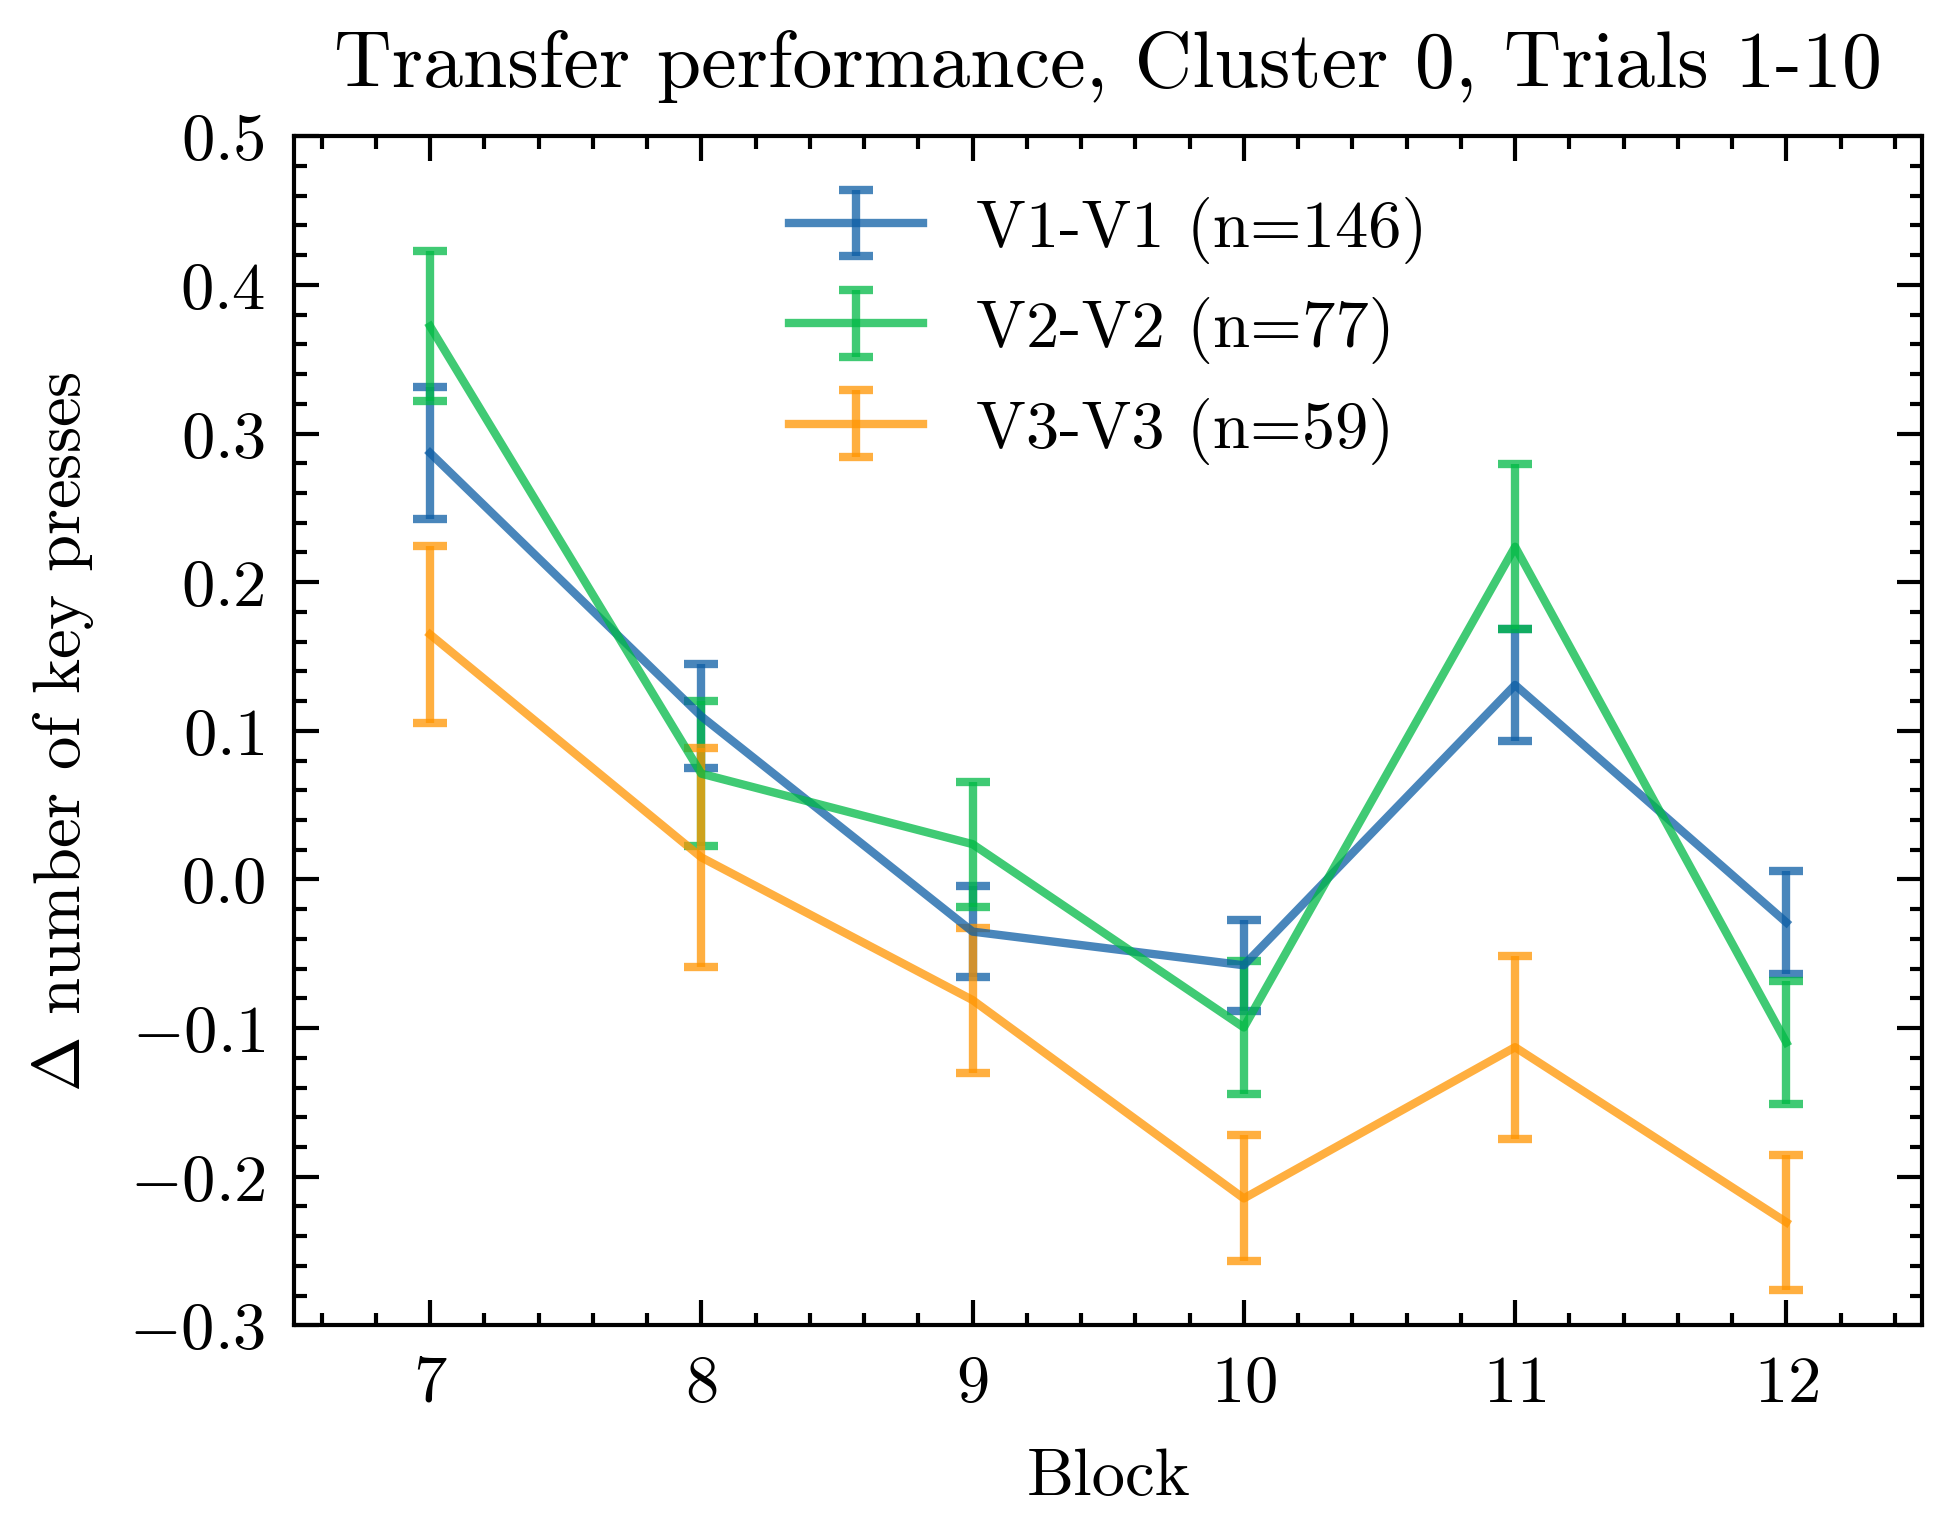

In [26]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V1-V1', 'V2-V2', 'V3-V3', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

## Plot learning curves for Cluster 1

### V1-V1, V1-V2, V1-V3

One-sided paired t-test between Blocks 7 and 11 for V1-V1:
Ttest_relResult(statistic=4.619853809492928, pvalue=9.95522834268512e-06)

One-sided paired t-test between Blocks 7 and 11 for V1-V2:
Ttest_relResult(statistic=1.181077690001785, pvalue=0.1224557184025136)

One-sided t-test between V1-V1 and V1-V2 on Block 11:
Ttest_indResult(statistic=-1.5291936171668408, pvalue=0.9353131845814702)

One-sided paired t-test between Blocks 7 and 11 for V1-V3:
Ttest_relResult(statistic=1.923937633159252, pvalue=0.031383291964152134)

One-sided t-test between V1-V2 and V1-V3 on Block 11:
Ttest_indResult(statistic=-1.0567295884128263, pvalue=0.852916097612548)


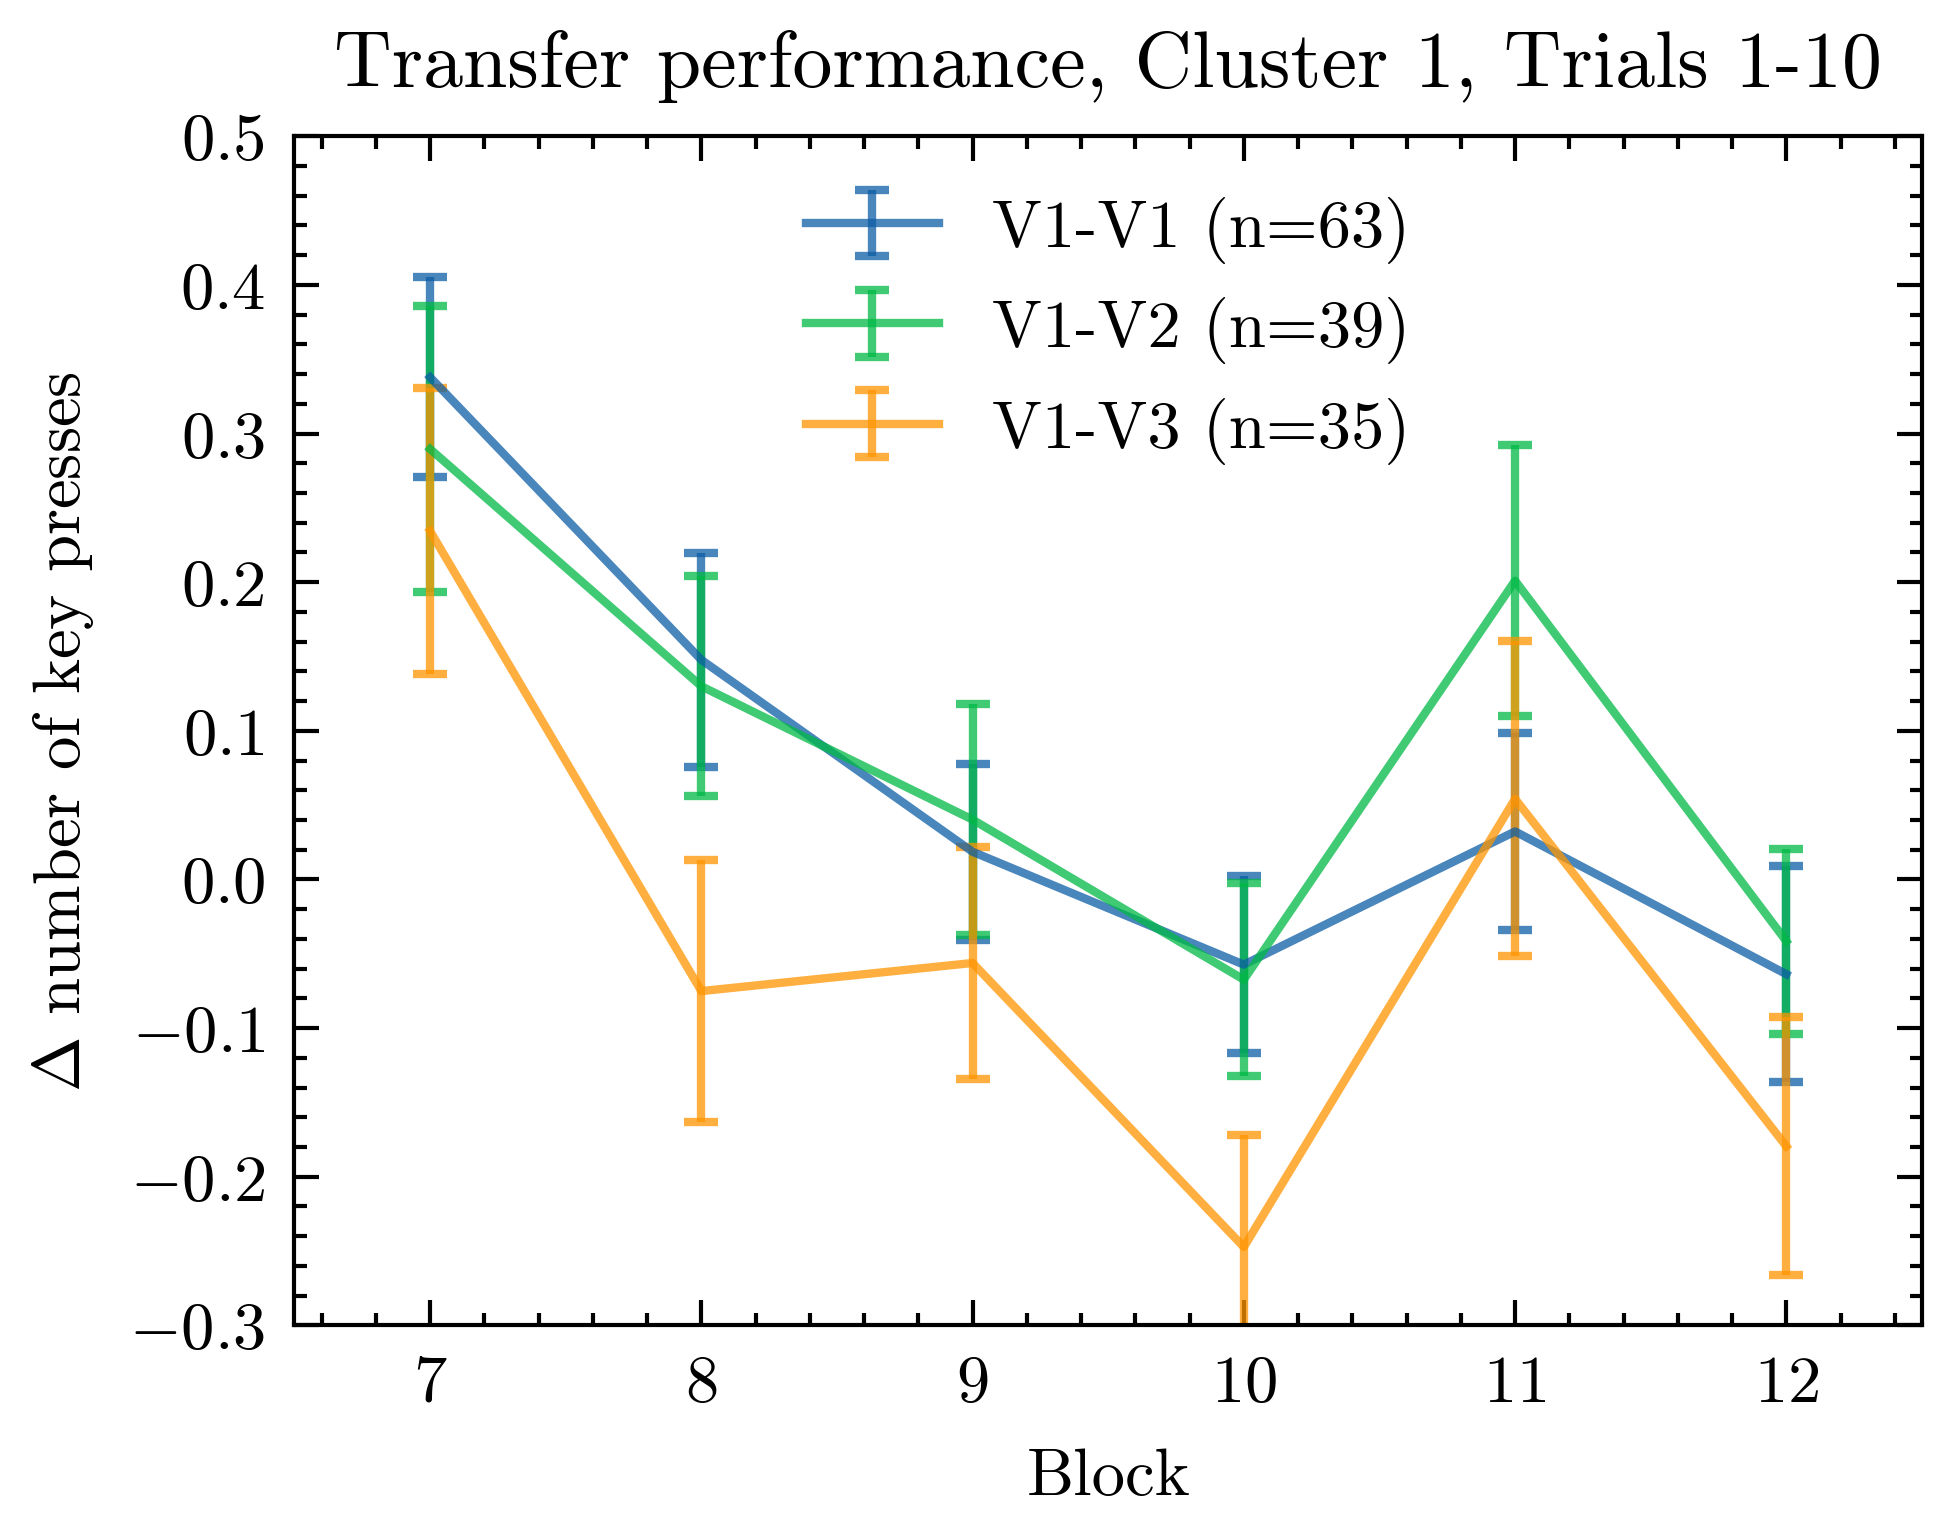

In [27]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V1-V1', 'V1-V2', 'V1-V3', exp=[1,2], cluster=1, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V2-V1, V2-V2

One-sided paired t-test between Blocks 7 and 11 for V2-V1:
Ttest_relResult(statistic=0.43933145825535913, pvalue=0.3315236567571148)

One-sided paired t-test between Blocks 7 and 11 for V2-V2:
Ttest_relResult(statistic=2.9542511928804585, pvalue=0.003287450742720874)

One-sided t-test between V2-V1 and V2-V2 on Block 11:
Ttest_indResult(statistic=0.5771642593707182, pvalue=0.2829592313149224)



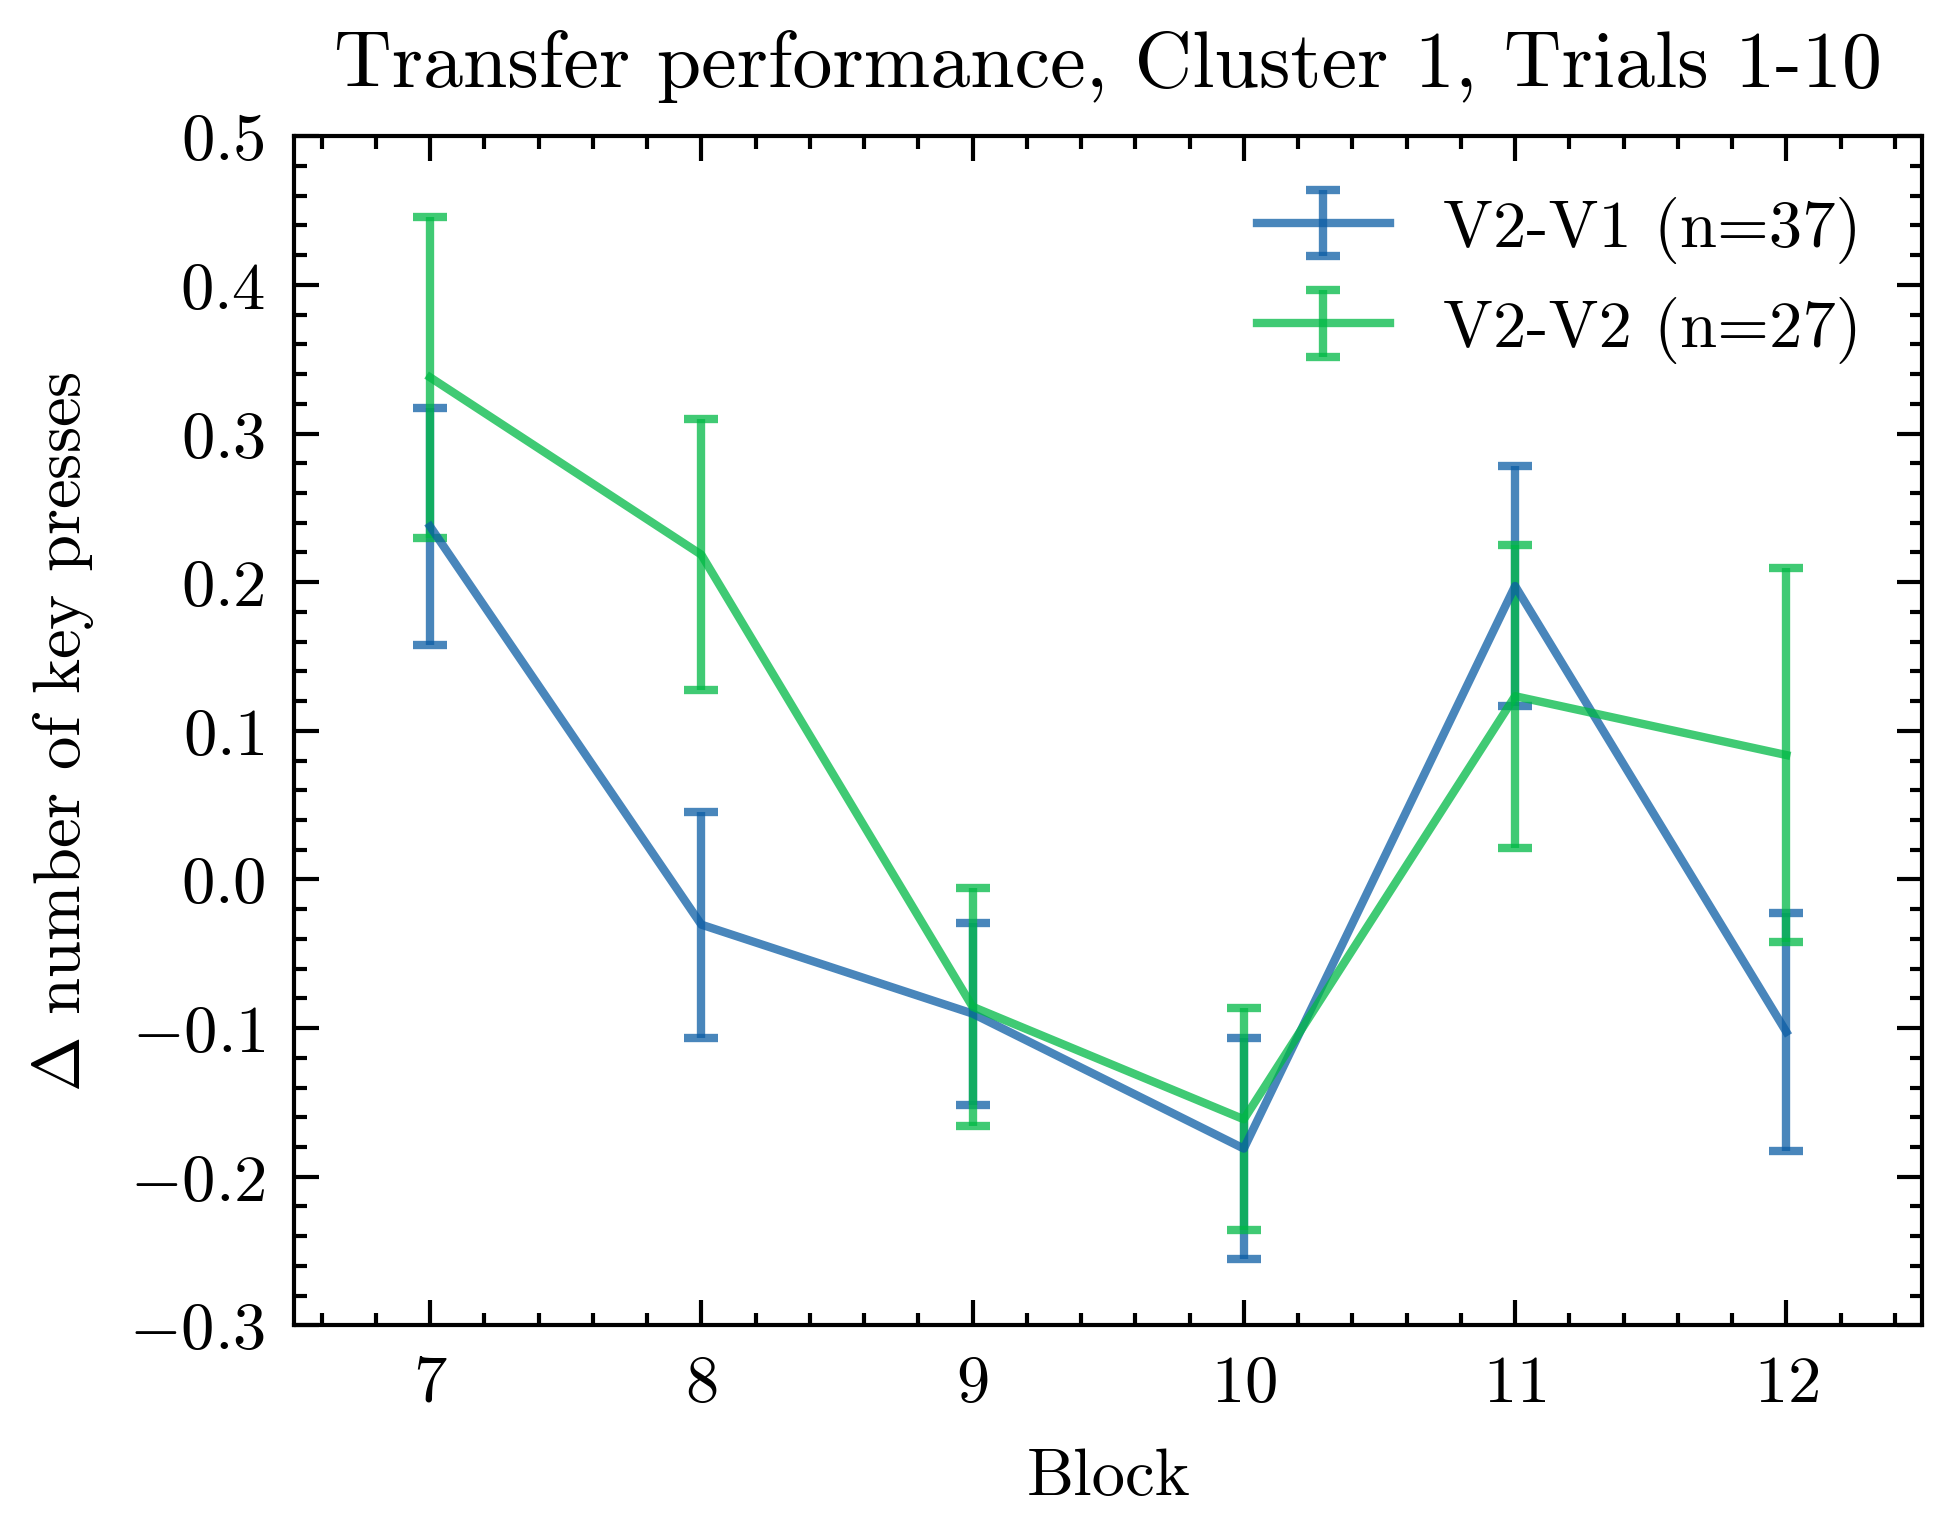

In [28]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V2-V1', 'V2-V2', '', exp=[1,2], cluster=1, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V3-V1, V3-V3

One-sided paired t-test between Blocks 7 and 11 for V3-V1:
Ttest_relResult(statistic=-0.6390468526791646, pvalue=0.7353047573613218)

One-sided paired t-test between Blocks 7 and 11 for V3-V3:
Ttest_relResult(statistic=2.043319296583497, pvalue=0.025100297053302627)

One-sided t-test between V3-V1 and V3-V3 on Block 11:
Ttest_indResult(statistic=2.1342079111022967, pvalue=0.018827457510049852)



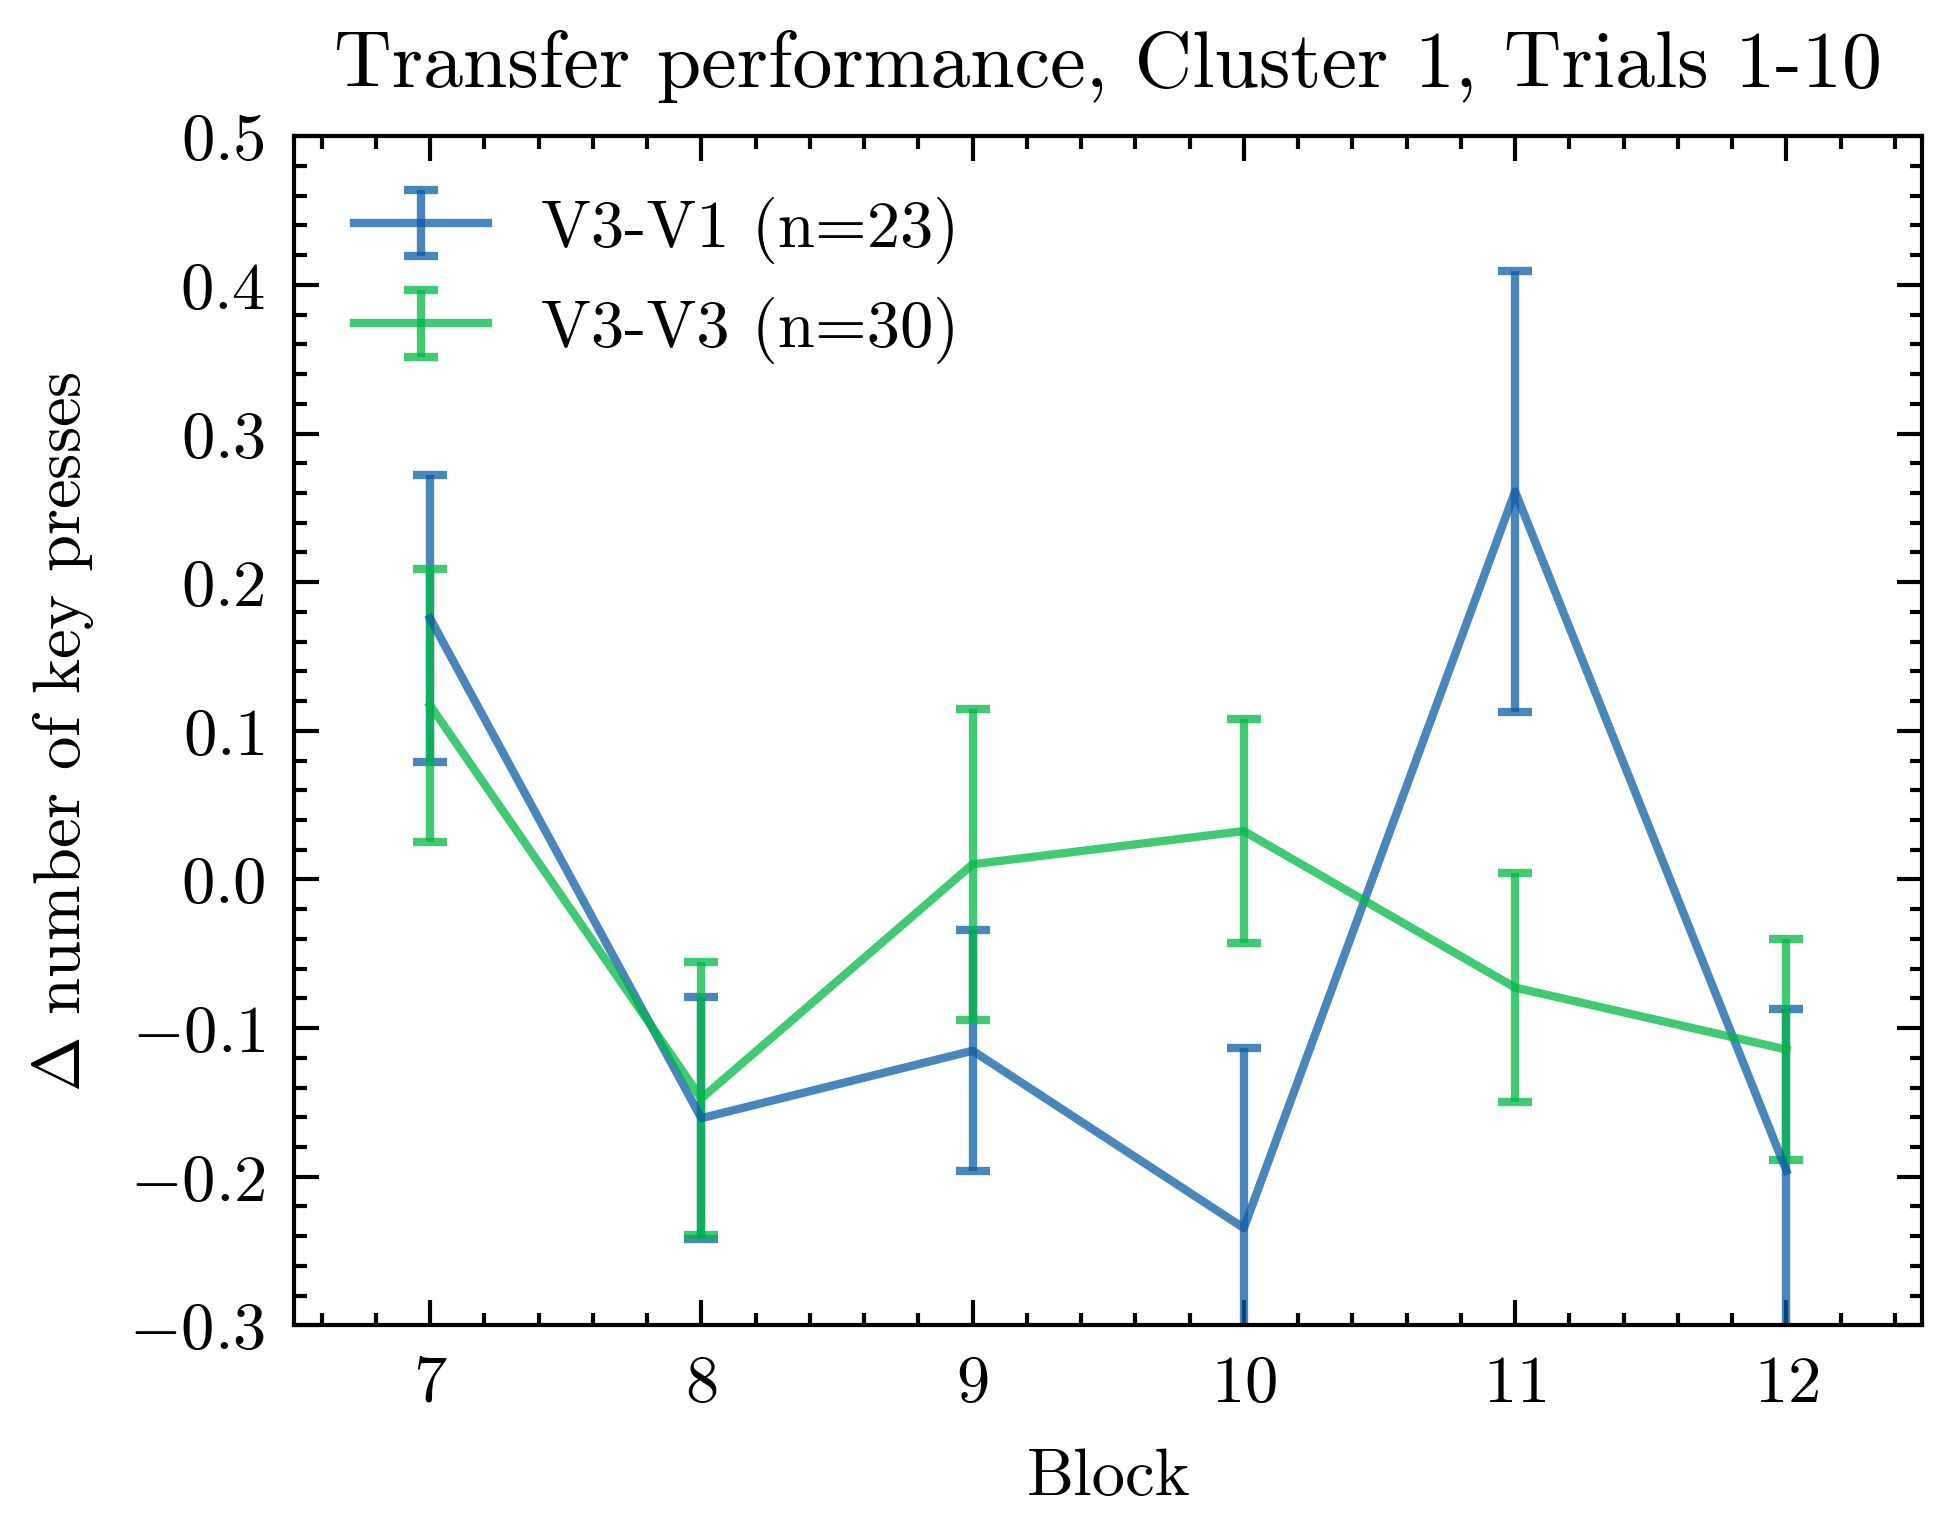

In [29]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V3-V1', 'V3-V3', '', exp=[1,2], cluster=1, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

V1 vs V3: Ttest_indResult(statistic=2.0954844492050024, pvalue=0.018358843177580204)
V1 vs V2: Ttest_indResult(statistic=0.274878765537449, pvalue=0.6082323710952072)
V2 vs V3: Ttest_indResult(statistic=1.7705518326454472, pvalue=0.03882706744903668)


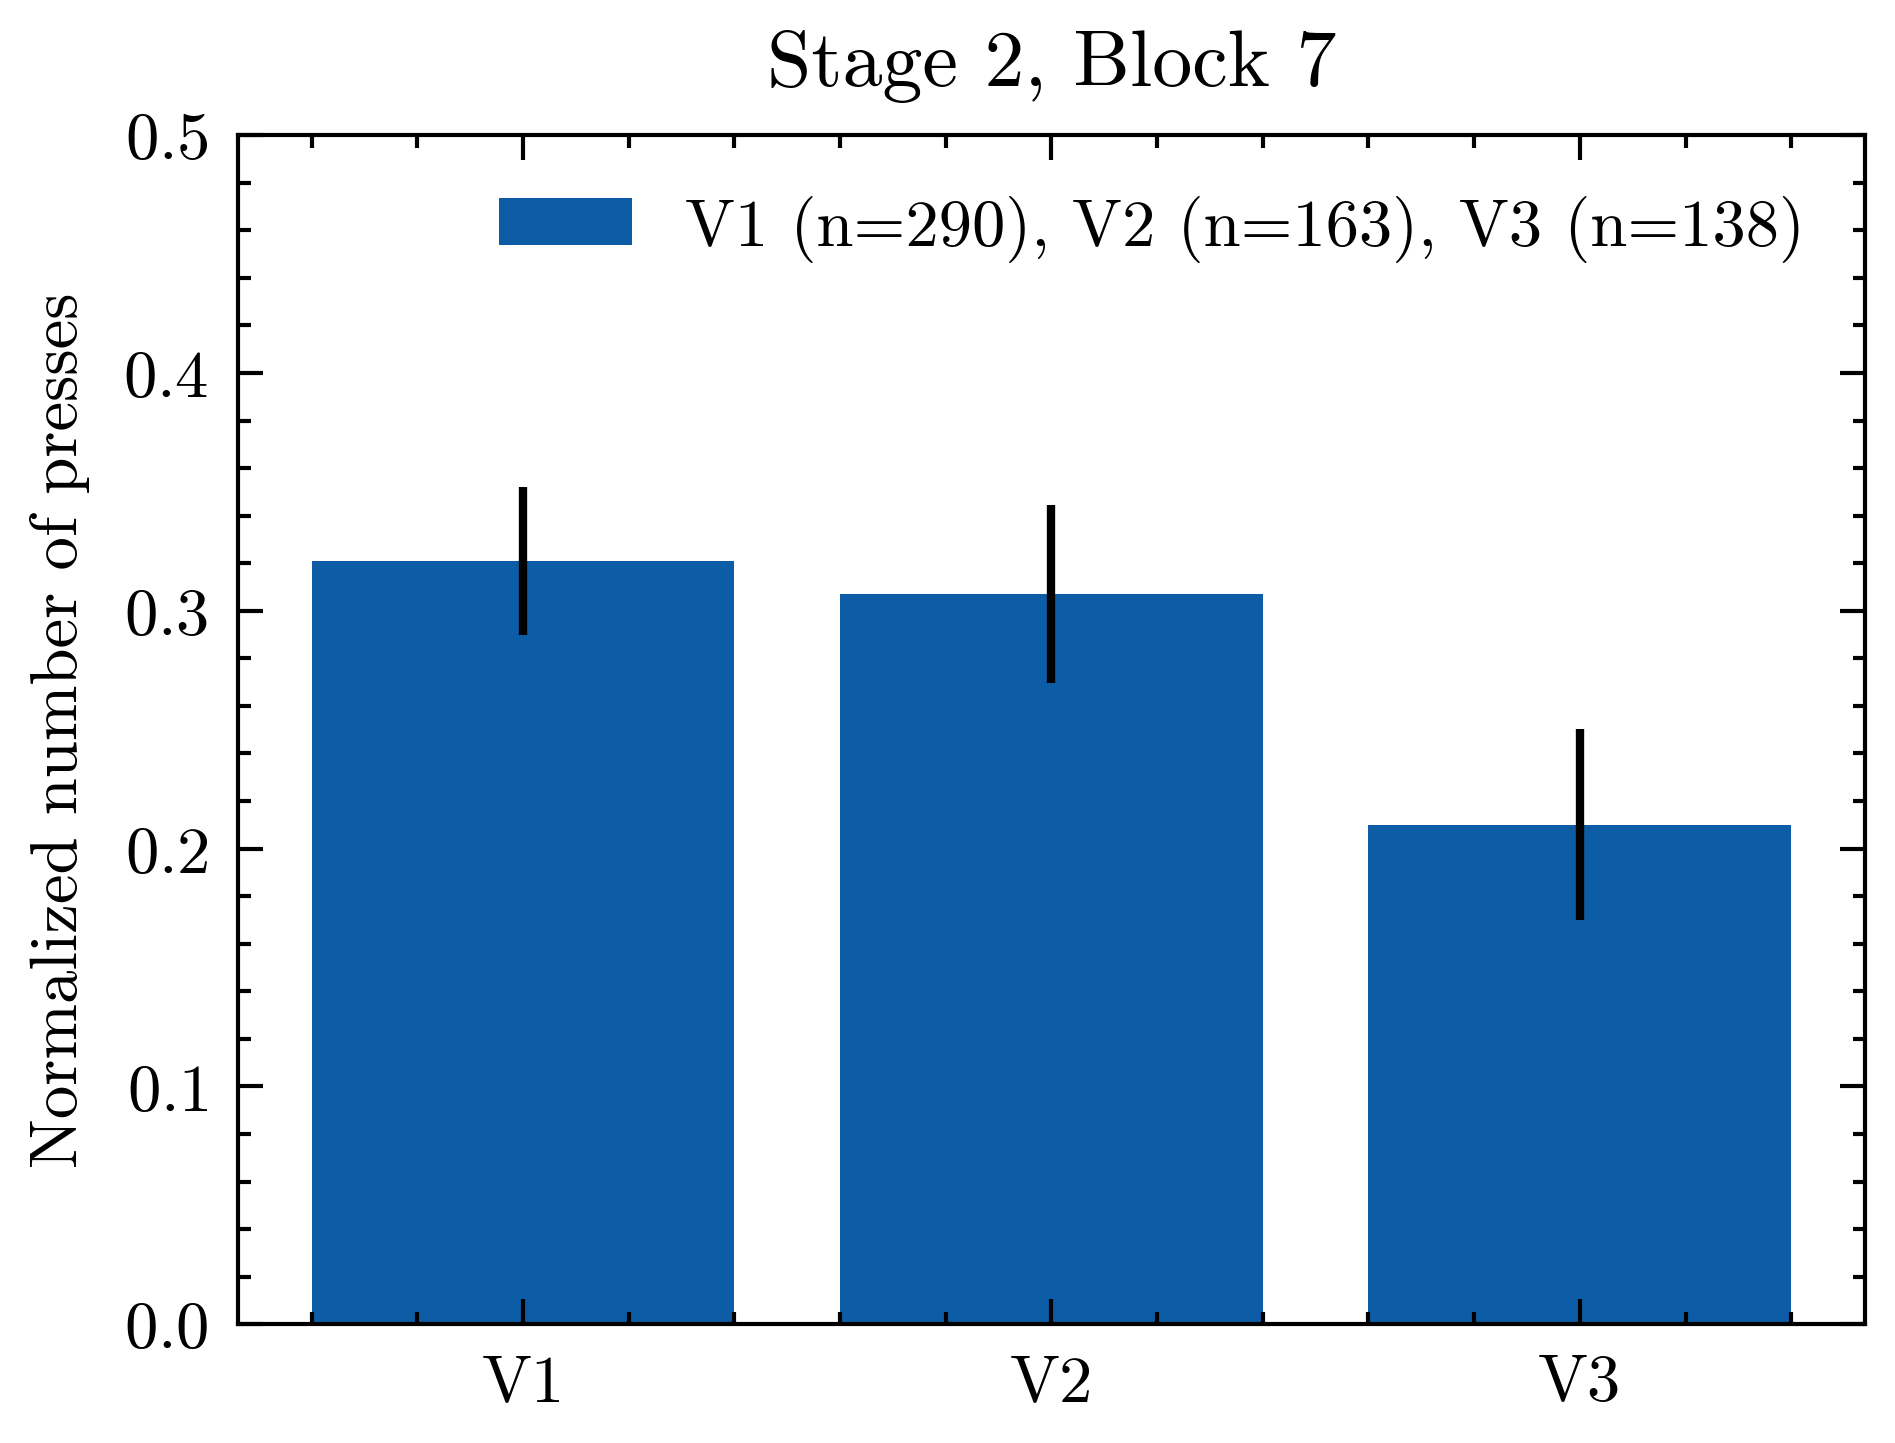

In [30]:
V1_data = helpers.slice_data(all_data, meta_data, 'V1', [1,2], 0)
V2_data = helpers.slice_data(all_data, meta_data, 'V2', [1,2], 0)
V3_data = helpers.slice_data(all_data, meta_data, 'V3', [1,2], 0)

num_subjects_1 = V1_data['tr'].shape[0]
num_subjects_2 = V2_data['tr'].shape[0]
num_subjects_3 = V3_data['tr'].shape[0]

_, n_presses_stage_2_1 = helpers.calc_mean(V1_data, start_trial=0, trials_to_probe=10)
n_presses_stage_2_1 -= np.nanmean(n_presses_stage_2_1[:,4:6], axis=1).reshape(-1,1)
_, n_presses_stage_2_2 = helpers.calc_mean(V2_data, start_trial=0, trials_to_probe=10)
n_presses_stage_2_2 -= np.nanmean(n_presses_stage_2_2[:,4:6], axis=1).reshape(-1,1)
_, n_presses_stage_2_3 = helpers.calc_mean(V3_data, start_trial=0, trials_to_probe=10)
n_presses_stage_2_3 -= np.nanmean(n_presses_stage_2_3[:,4:6], axis=1).reshape(-1,1)

v1_vs_v3 = stats.ttest_ind(n_presses_stage_2_1[:,6], n_presses_stage_2_3[:,6], alternative='greater')
v1_vs_v2 = stats.ttest_ind(n_presses_stage_2_1[:,6], n_presses_stage_2_2[:,6], alternative='less')
v2_vs_v3 = stats.ttest_ind(n_presses_stage_2_2[:,6], n_presses_stage_2_3[:,6], alternative='greater')

print(f'V1 vs V3: {v1_vs_v3}')
print(f'V1 vs V2: {v1_vs_v2}')
print(f'V2 vs V3: {v2_vs_v3}')

plt.bar(['V1', 'V2', 'V3'], [np.mean(n_presses_stage_2_1[:,6]), np.mean(n_presses_stage_2_2[:,6]), np.mean(n_presses_stage_2_3[:,6])], yerr=[stats.sem(n_presses_stage_2_1[:,6]), stats.sem(n_presses_stage_2_2[:,6]), stats.sem(n_presses_stage_2_3[:,6])])
plt.ylim([0, 0.5])
plt.ylabel('Normalized number of presses')
plt.title('Stage 2, Block 7')
plt.legend([f'V1 (n={num_subjects_1}), V2 (n={num_subjects_2}), V3 (n={num_subjects_3})'])
plt.savefig('plots/normalized_presses_block_7.svg', format='svg', dpi=1200)